In [1]:
%matplotlib notebook

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import ROOT
from ROOT import TFile, TTree, TCanvas, TH2D, TH1F
from scipy import constants
import pandas as pd
#plt.rcParams['text.usetex'] = True

from scipy.stats import binned_statistic_2d
import plotly.graph_objects as go

Welcome to JupyROOT 6.22/09


In [3]:
f = TFile("selectedEventsSim_v2me06_101524_withContainedVar.root","READ") # with track completeness score
#f = TFile("selectedEventsSim_v2me06_071524_withContainedVar.root","READ") # with containment variable
#f = TFile("selectedEventsSim_v2me06_070924.root","READ") # new summer 2024 file from Nick, run 1
#f = TFile("selectedEventsSim_070924.root","READ") # old but ok (without error), run 3
#f = TFile("selectedEventsSim_050924_recoTest_2.root","READ") #old with error, run  3
t = f.Get("selectedEvents")

entries = t.GetEntries()
print(entries)

9964


In [4]:
muMom_list = []
piMom_list = []
lPMom_list = []

recoPiMom_list = []
recoMuMom_list = []
recoLPMom_list = []
weights_list = []

# collect event entries that had no -1's
passedIndices_list = []

#hpT = TH1F( 'hpT', 'This is the truth distribution', 100, -1, 2 )
#hpR = TH1F( 'hpR', 'This is the reco distribution', 100, -1, 2 )

completeness = 0.5

for e in range(entries):

    t.GetEntry(e)
    
    #hpT.Fill( (t.muonMom_)/1000. )
    #hpR.Fill( (t.recoMomMu_) )
    
    #print("Reco muonMom, pionMom, lPmom: ", t.recoMomMu_, ",  ", t.recoMomPi_, ", ", t.recoMomP_)
    
    muMom_list.append(t.muonMom_)
    piMom_list.append(t.pionMom_)
    lPMom_list.append(t.lProtonMom_)
    
    recoMuMom_list.append(t.recoMomMu_)
    recoPiMom_list.append(t.recoMomPi_)
    recoLPMom_list.append(t.recoMomP_)
    
    weights_list.append(t.weight_)
    
    if (t.recoMomMu_ != -1) and (t.recoMomPi_ != -1) and (t.recoMomP_ != -1 ):
        if (t.trackCompMu_ > completeness) and (t.trackCompPi_ > completeness) and (t.trackCompP_ > completeness):
        #print("This one passed! Appending entry...")
            passedIndices_list.append( e )
        
    
muMom_arr = np.asarray(muMom_list)
piMom_arr = np.asarray(piMom_list)
lPMom_arr = np.asarray(lPMom_list)

recoMuMom_arr = np.asarray(recoMuMom_list)
recoPiMom_arr = np.asarray(recoPiMom_list)
recoLPMom_arr = np.asarray(recoLPMom_list)

weights_arr = np.asarray(weights_list)

#convert truth from mev to gev
#muMom_arr = muMom_arr / 1000.

print("len(muMom_list)", len(muMom_list))
print("len(recoMuMom_list)", len(recoMuMom_list))

print("truth muMom_arr: ", muMom_arr)
print("truth muMom_arr.shape: ", muMom_arr.shape)

print("recoMuMom_arr: ", recoMuMom_arr)
print("recoMuMom_arr.shape: ", recoMuMom_arr.shape)

print("This is how many events had all 3 particles reconstructed: ", len(passedIndices_list))
#print("The indices are: ", passedIndices_list)

len(muMom_list) 9964
len(recoMuMom_list) 9964
truth muMom_arr:  [ 355.80207299 1114.60073446  247.95614851 ...  726.26835215  172.45525867
  654.3115071 ]
truth muMom_arr.shape:  (9964,)
recoMuMom_arr:  [154.55729524 344.9797522   -1.         ... 240.77800835  -1.
  -1.        ]
recoMuMom_arr.shape:  (9964,)
This is how many events had all 3 particles reconstructed:  1973


In [5]:
# grab only events that had all 3 particles reconstructed 
# and completeness req met

passedTruthMomMu_list = []
passedTruthMomPi_list = []
passedTruthMomLP_list = []
passedRecoMomMu_list = []
passedRecoMomPi_list = []
passedRecoMomLP_list = []

passedWeights_list = []

passedTruthMomMuContained_list = []
passedTruthMomPiContained_list = []
passedTruthMomLPContained_list = []
passedRecoMomMuContained_list = []
passedRecoMomPiContained_list = []
passedRecoMomLPContained_list = []

passedWeightsContained_list = []

for e in range(entries):

    t.GetEntry(e)
    
    if (e in passedIndices_list):
        
        passedTruthMomMu_list.append(t.muonMom_)
        passedTruthMomPi_list.append(t.pionMom_)
        passedTruthMomLP_list.append(t.lProtonMom_)
        
        passedRecoMomMu_list.append(t.recoMomMu_)
        passedRecoMomPi_list.append(t.recoMomPi_)
        passedRecoMomLP_list.append(t.recoMomP_)
        
        passedWeights_list.append(t.weight_)
        
        # checks if the entire neutrino intrxn event was contained (event-level)
        if (t.recoContained_==2):
            
            passedTruthMomMuContained_list.append(t.muonMom_)
            passedTruthMomPiContained_list.append(t.pionMom_)
            passedTruthMomLPContained_list.append(t.lProtonMom_)
            
            passedRecoMomMuContained_list.append(t.recoMomMu_)
            passedRecoMomPiContained_list.append(t.recoMomPi_)
            passedRecoMomLPContained_list.append(t.recoMomP_)
            
            passedWeightsContained_list.append(t.weight_)
        
print("This is the passedRecoMomPi_list size: ", len(passedRecoMomPi_list))
print("This is the passedRecoMomPiContained_list size: ", len(passedRecoMomPiContained_list))

passedTruthMomMu_arr = np.asarray(passedTruthMomMu_list)
passedTruthMomPi_arr = np.asarray(passedTruthMomPi_list)
passedTruthMomLP_arr = np.asarray(passedTruthMomLP_list)
passedRecoMomMu_arr = np.asarray(passedRecoMomMu_list)
passedRecoMomPi_arr = np.asarray(passedRecoMomPi_list)
passedRecoMomLP_arr = np.asarray(passedRecoMomLP_list)
passedWeights_arr = np.asarray(passedWeights_list)

passedTruthMomMuContained_arr = np.asarray(passedTruthMomMuContained_list)
passedTruthMomPiContained_arr = np.asarray(passedTruthMomPiContained_list)
passedTruthMomLPContained_arr = np.asarray(passedTruthMomLPContained_list)
passedRecoMomMuContained_arr = np.asarray(passedRecoMomMuContained_list)
passedRecoMomPiContained_arr = np.asarray(passedRecoMomPiContained_list)
passedRecoMomLPContained_arr = np.asarray(passedRecoMomLPContained_list)
passedWeightsContained_arr = np.asarray(passedWeightsContained_list)

print(passedTruthMomMu_arr)

# convert mev to gev
passedTruthMomMu_arr = passedTruthMomMu_arr / 1000
passedTruthMomPi_arr = passedTruthMomPi_arr / 1000
passedTruthMomLP_arr = passedTruthMomLP_arr / 1000
passedRecoMomMu_arr = passedRecoMomMu_arr / 1000
passedRecoMomPi_arr = passedRecoMomPi_arr / 1000
passedRecoMomLP_arr = passedRecoMomLP_arr / 1000

passedTruthMomMuContained_arr = passedTruthMomMuContained_arr / 1000
passedTruthMomPiContained_arr = passedTruthMomPiContained_arr / 1000
passedTruthMomLPContained_arr = passedTruthMomLPContained_arr / 1000
passedRecoMomMuContained_arr = passedRecoMomMuContained_arr / 1000
passedRecoMomPiContained_arr = passedRecoMomPiContained_arr / 1000
passedRecoMomLPContained_arr = passedRecoMomLPContained_arr / 1000

print(passedTruthMomMu_arr)
print(passedRecoMomMu_arr)

print(passedTruthMomPi_arr)
print(passedRecoMomPi_arr)

This is the passedRecoMomPi_list size:  1973
This is the passedRecoMomPiContained_list size:  733
[ 484.85274369 1470.10432046  402.87882939 ...  713.70771625  337.82426583
  323.3819024 ]
[0.48485274 1.47010432 0.40287883 ... 0.71370772 0.33782427 0.3233819 ]
[0.26068203 0.62574509 0.38984371 ... 0.18793692 0.15730704 0.30671066]
[0.32081761 0.12259296 0.18760964 ... 0.3552335  0.69904504 0.13983117]
[0.11741008 0.12330813 0.17998271 ... 0.25254604 0.43570441 0.13441755]


In [6]:
# POT scaling for events that passed reco only

targetPOT = 1.3e21
sumPOT = 4.68e20 # this is for run 1
#sumPOT = 8.98e20 # this is for run 3

scale = targetPOT / sumPOT
print("Scale is: ", scale)

print("passedWeights_arr", passedWeights_arr)

print(np.sum(passedWeights_arr))
totalEvents = np.sum(passedWeights_arr)*scale
print("totalEvents: ", totalEvents)

print(np.sum(passedWeightsContained_arr))
totalEventsContained = np.sum(passedWeightsContained_arr)*scale
print("totalEvents (contained): ", totalEventsContained)

Scale is:  2.7777777777777777
passedWeights_arr [1. 1. 1. ... 1. 1. 1.]
1971.4495310029681
totalEvents:  5476.248697230467
731.2149566241326
totalEvents (contained):  2031.1526572892571


## Muons

<IPython.core.display.Javascript object>


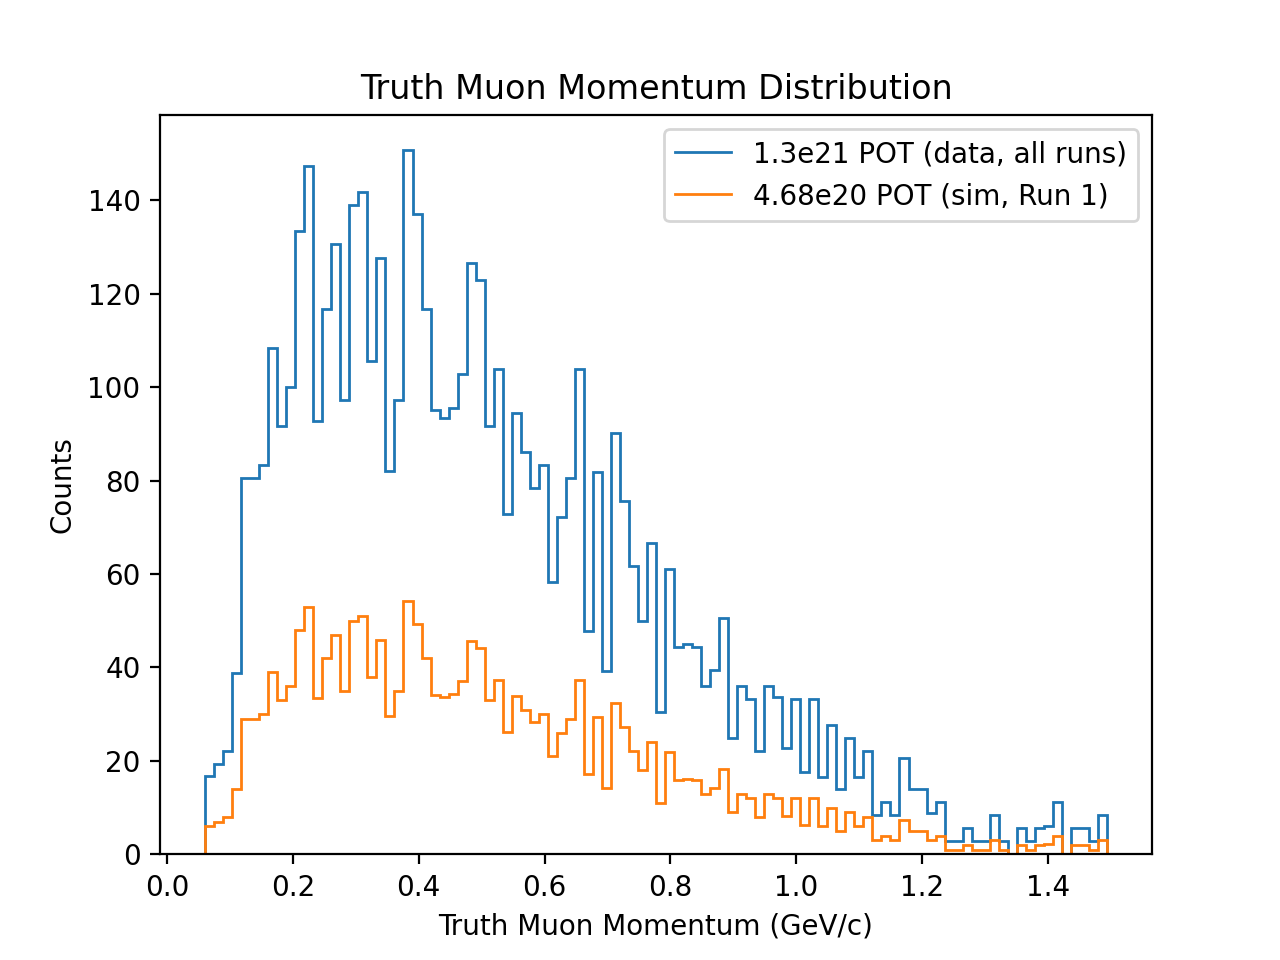

1971.4495310029683
5476.248697230465


In [7]:
# plotting only events that passed
# truth muon mom

ax = plt.figure().gca()
ax.yaxis.get_major_locator().set_params(integer=True)

counts, bins = np.histogram(passedTruthMomMu_arr, bins=100, weights=passedWeights_arr)
scaledCounts = counts*scale

print(sum(counts))
print(sum(scaledCounts))

plt.stairs(scaledCounts, bins, label="1.3e21 POT (data, all runs)")
plt.stairs(counts, bins, label="4.68e20 POT (sim, Run 1)")


plt.xlabel('Truth Muon Momentum (GeV/c)')
plt.ylabel('Counts')
plt.title('Truth Muon Momentum Distribution')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

<IPython.core.display.Javascript object>


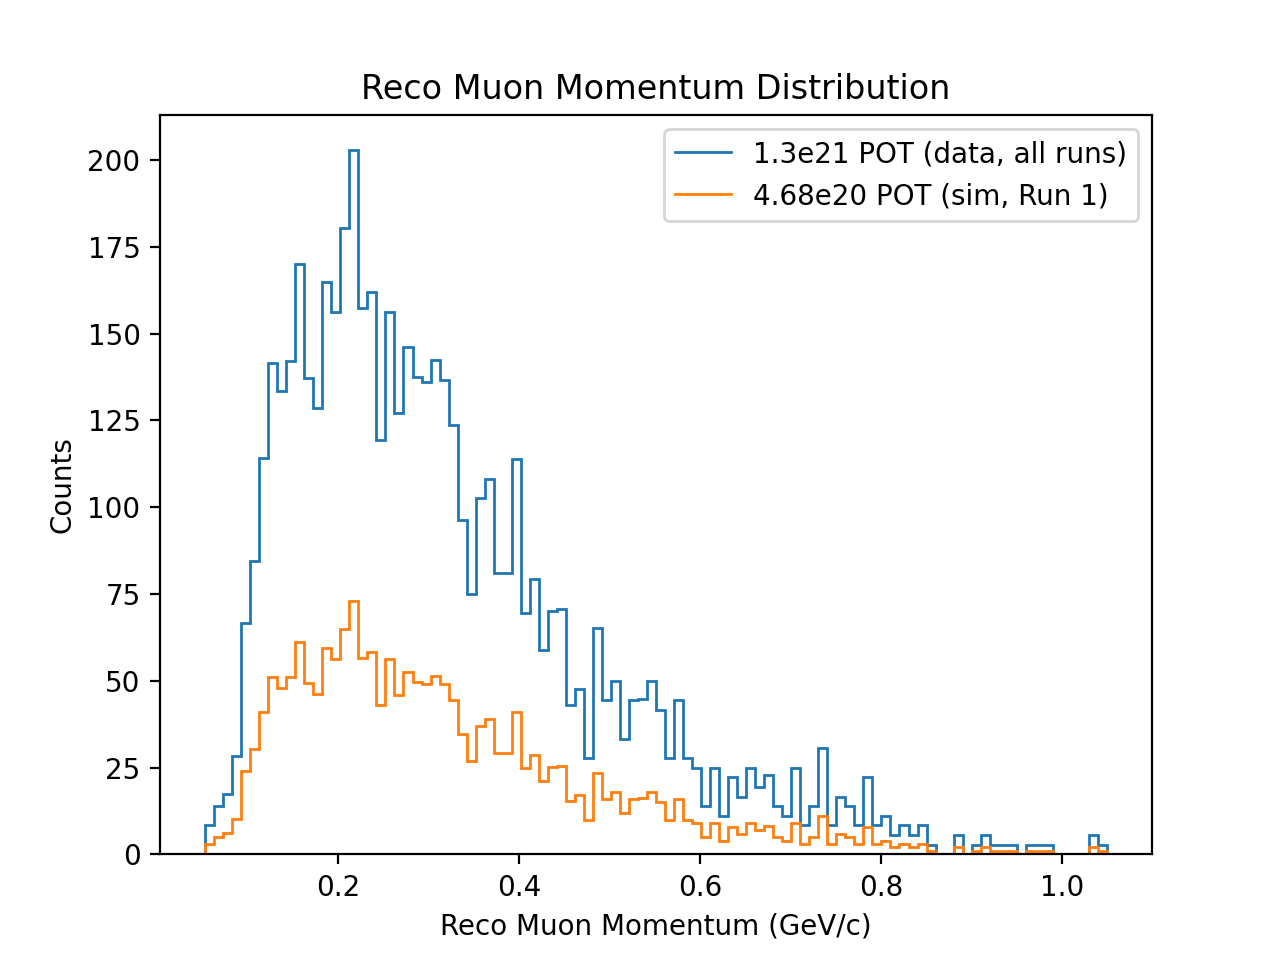

counts:  [ 3.          5.          6.21302068 10.20797467 24.         30.40895748
 41.14778258 51.         48.         51.1167935  61.23246598 49.38412148
 46.25999367 59.36845779 56.20436704 65.         73.         56.67626029
 58.33257616 43.         56.26130223 45.77815622 52.56956203 49.53108356
 49.         51.26290739 49.20353496 44.49242687 34.69098592 27.
 37.         38.88826093 29.15403521 29.18932807 41.         25.
 28.55655789 21.22021425 25.21625006 25.41535819 15.47308779 17.18541596
 10.         23.48076403 16.         18.         12.00004602 16.
 16.13993168 18.         15.         10.         16.         10.
  9.          5.          9.          4.          8.          6.
  9.00192211  7.          8.18562829  5.          4.          9.
  3.          5.         11.          3.          6.          5.
  3.          8.          3.          4.          2.          3.
  2.          3.          1.          0.          0.          2.
  0.          1.          2.          1. 

In [8]:
# plotting only events that passed
# reco muon mom

ax = plt.figure().gca()
ax.yaxis.get_major_locator().set_params(integer=True)

counts, bins = np.histogram(passedRecoMomMu_arr, bins=100, weights=passedWeights_arr)
scaledCounts = counts*scale

print("counts: ", counts)
print("scaledCounts: ", scaledCounts)

print(sum(counts))
print(sum(scaledCounts))


plt.stairs(scaledCounts, bins, label="1.3e21 POT (data, all runs)")
plt.stairs(counts, bins, label="4.68e20 POT (sim, Run 1)")

plt.xlabel('Reco Muon Momentum (GeV/c)')
plt.ylabel('Counts')
plt.title('Reco Muon Momentum Distribution')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

<IPython.core.display.Javascript object>


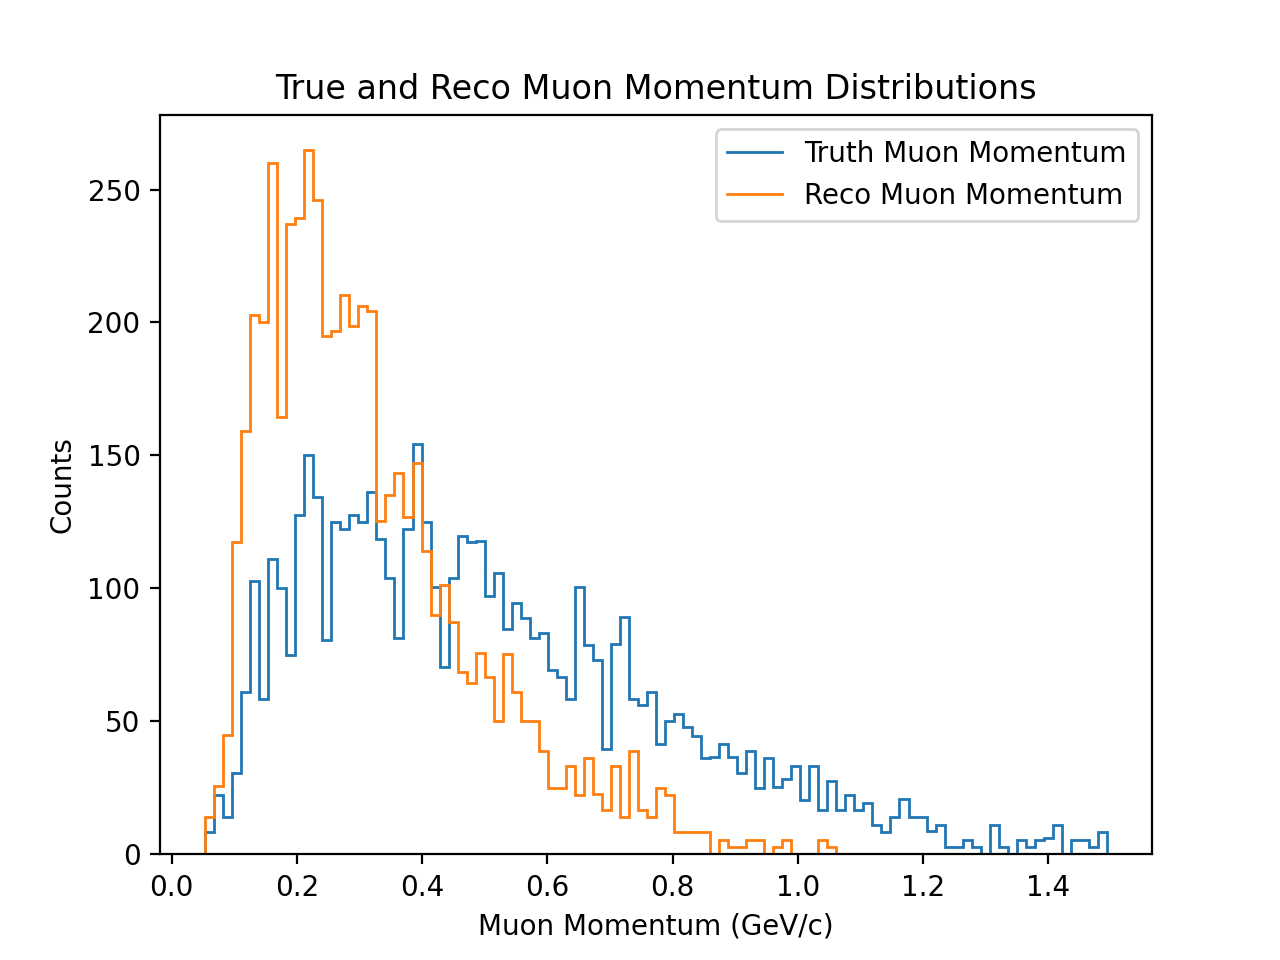

max value of truth:  1.4935290416162952
max value of reco:  1.0492548643180117
maxRange:  1.4935290416162952
truth bins:  [0.05341194 0.06781311 0.08221428 0.09661545 0.11101662 0.1254178
 0.13981897 0.15422014 0.16862131 0.18302248 0.19742365 0.21182482
 0.22622599 0.24062716 0.25502833 0.26942951 0.28383068 0.29823185
 0.31263302 0.32703419 0.34143536 0.35583653 0.3702377  0.38463887
 0.39904004 0.41344122 0.42784239 0.44224356 0.45664473 0.4710459
 0.48544707 0.49984824 0.51424941 0.52865058 0.54305176 0.55745293
 0.5718541  0.58625527 0.60065644 0.61505761 0.62945878 0.64385995
 0.65826112 0.67266229 0.68706347 0.70146464 0.71586581 0.73026698
 0.74466815 0.75906932 0.77347049 0.78787166 0.80227283 0.816674
 0.83107518 0.84547635 0.85987752 0.87427869 0.88867986 0.90308103
 0.9174822  0.93188337 0.94628454 0.96068571 0.97508689 0.98948806
 1.00388923 1.0182904  1.03269157 1.04709274 1.06149391 1.07589508
 1.09029625 1.10469742 1.1190986  1.13349977 1.14790094 1.16230211
 1.17670328

In [9]:
# muon truth and reco plot for comparison (distributions)

ax = plt.figure().gca()
ax.yaxis.get_major_locator().set_params(integer=True)

# Creating bins (should be same for truth and reco if plotted together)
numberBins = 100

maxTruth = np.max(passedTruthMomMu_arr)
maxReco = np.max(passedRecoMomMu_arr)
maxRange = maxReco if maxReco > maxTruth else maxTruth

minTruth = np.min(passedTruthMomMu_arr)
minReco = np.min(passedRecoMomMu_arr)
minRange = minReco if minReco < minTruth else minTruth

binEdgeRange = (minRange, maxRange)

print("max value of truth: ", maxTruth)
print("max value of reco: ", maxReco)
print("maxRange: ", maxRange)

countsTrue, binsTrue = np.histogram(passedTruthMomMu_arr, bins=numberBins, weights=passedWeights_arr, range=binEdgeRange)
scaledCountsTrue = countsTrue*scale

print("truth bins: ", binsTrue)

print(sum(countsTrue))
print(sum(scaledCountsTrue))

countsReco, binsReco = np.histogram(passedRecoMomMu_arr, bins=numberBins, weights=passedWeights_arr, range=binEdgeRange)
scaledCountsReco = countsReco*scale

print("reco bins: ", binsReco)

print(sum(countsReco))
print(sum(scaledCountsReco))

plt.stairs(scaledCountsTrue, binsTrue, label="Truth Muon Momentum")
plt.stairs(scaledCountsReco, binsReco, label="Reco Muon Momentum")

plt.xlabel('Muon Momentum (GeV/c)')
plt.ylabel('Counts')
plt.title('True and Reco Muon Momentum Distributions')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

<IPython.core.display.Javascript object>


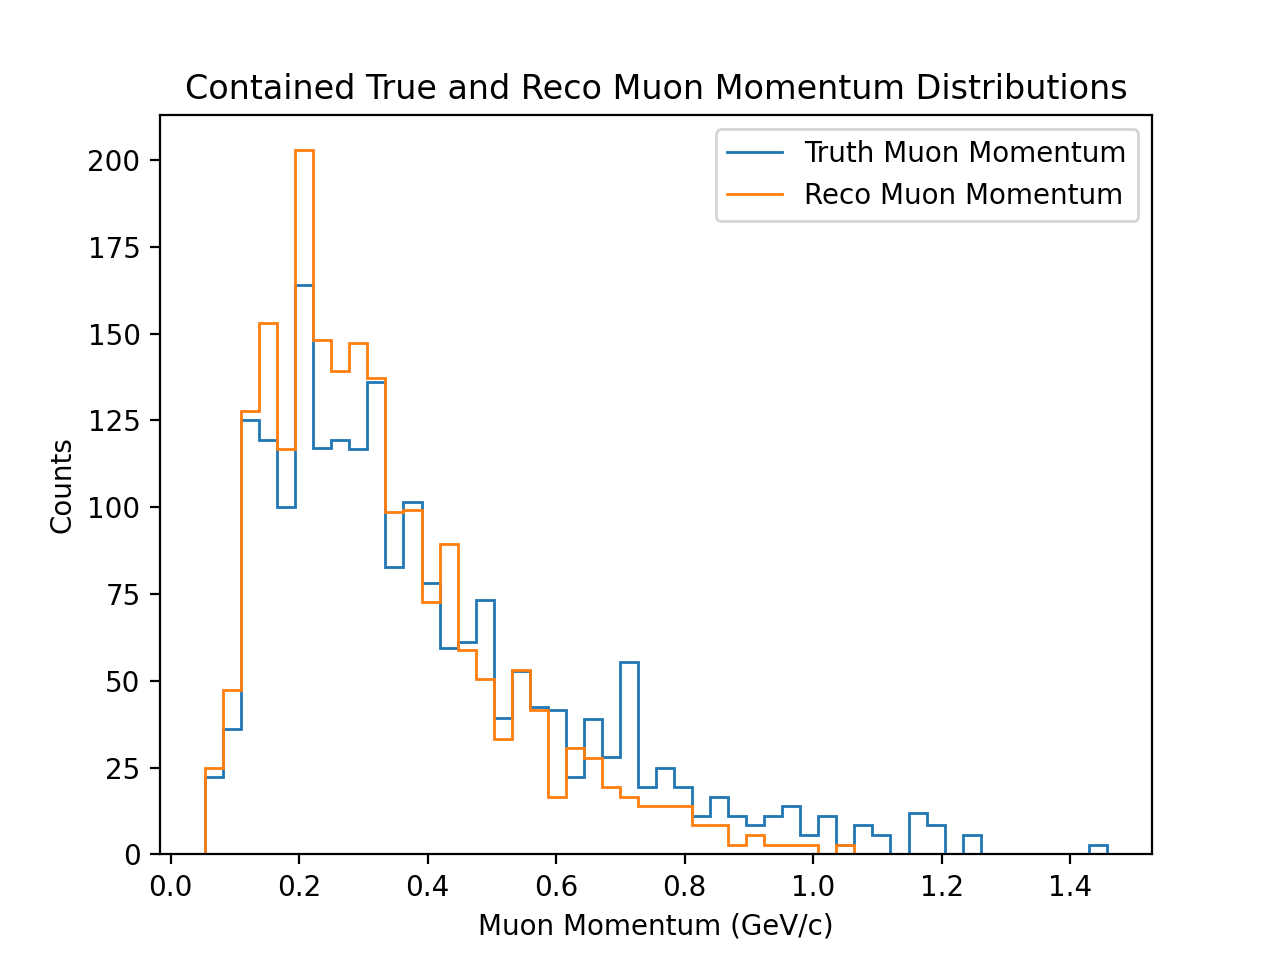

max value of truth:  1.4572522259830474
max value of reco:  1.0492548643180117
maxRange:  1.4572522259830474
scaledCountsTrue:  [ 22.22222222  36.11111111 125.         119.44458546 100.
 163.88888889 117.19586452 119.44444444 116.66667681 136.11111111
  82.81341427 101.53406653  78.1704002   59.4777147   61.1111117
  73.18456901  39.277588    52.77777778  42.32785437  41.66666667
  22.22222222  38.88888889  28.10206314  55.55555556  19.44444444
  25.          19.44444444  11.11111111  16.66666667  11.11111111
   8.33333333  11.11111111  13.88888889   5.55555556  11.11111111
   2.78311696   8.33333333   5.55555556   0.          11.84140941
   8.33333333   0.           5.55555556   0.           0.
   0.           0.           0.           0.           2.77777778]
731.2149566241327
2031.1526572892574
scaledCountsReco:  [ 25.          47.22222222 127.77777778 153.10220416 116.66666667
 202.77777778 148.08512032 139.19812561 147.22222222 137.23403182
  98.68869318  99.21397626  72.77882165 

In [26]:
# contained muon truth and reco plot for comparison (distributions)

ax = plt.figure().gca()
ax.yaxis.get_major_locator().set_params(integer=True)

# Creating bins (should be same for truth and reco if plotted together)
numberBins = 50

maxTruth = np.max(passedTruthMomMuContained_arr)
maxReco = np.max(passedRecoMomMuContained_arr)
maxRange = maxReco if maxReco > maxTruth else maxTruth

minTruth = np.min(passedTruthMomMuContained_arr)
minReco = np.min(passedRecoMomMuContained_arr)
minRange = minReco if minReco < minTruth else minTruth

binEdgeRange = (minRange, maxRange)

print("max value of truth: ", maxTruth)
print("max value of reco: ", maxReco)
print("maxRange: ", maxRange)

countsTrue, binsTrue = np.histogram(passedTruthMomMuContained_arr, bins=numberBins, weights=passedWeightsContained_arr, range=binEdgeRange)
scaledCountsTrue = countsTrue*scale

print("scaledCountsTrue: ", scaledCountsTrue)

print(sum(countsTrue))
print(sum(scaledCountsTrue))

# Note that here, I pass in the bins from the truth distrib above, so they are binned the same
countsReco, binsReco = np.histogram(passedRecoMomMuContained_arr, bins=numberBins, weights=passedWeightsContained_arr, range=binEdgeRange)
scaledCountsReco = countsReco*scale

plt.stairs(scaledCountsTrue, binsTrue, label="Truth Muon Momentum")
plt.stairs(scaledCountsReco, binsReco, label="Reco Muon Momentum")

print("scaledCountsReco: ", scaledCountsReco)

print(sum(countsReco))
print(sum(scaledCountsReco))

print("truth bins: ", binsTrue)
print("reco bins: ", binsReco)

plt.xlabel('Muon Momentum (GeV/c)')
plt.ylabel('Counts')
plt.title('Contained True and Reco Muon Momentum Distributions')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

<IPython.core.display.Javascript object>


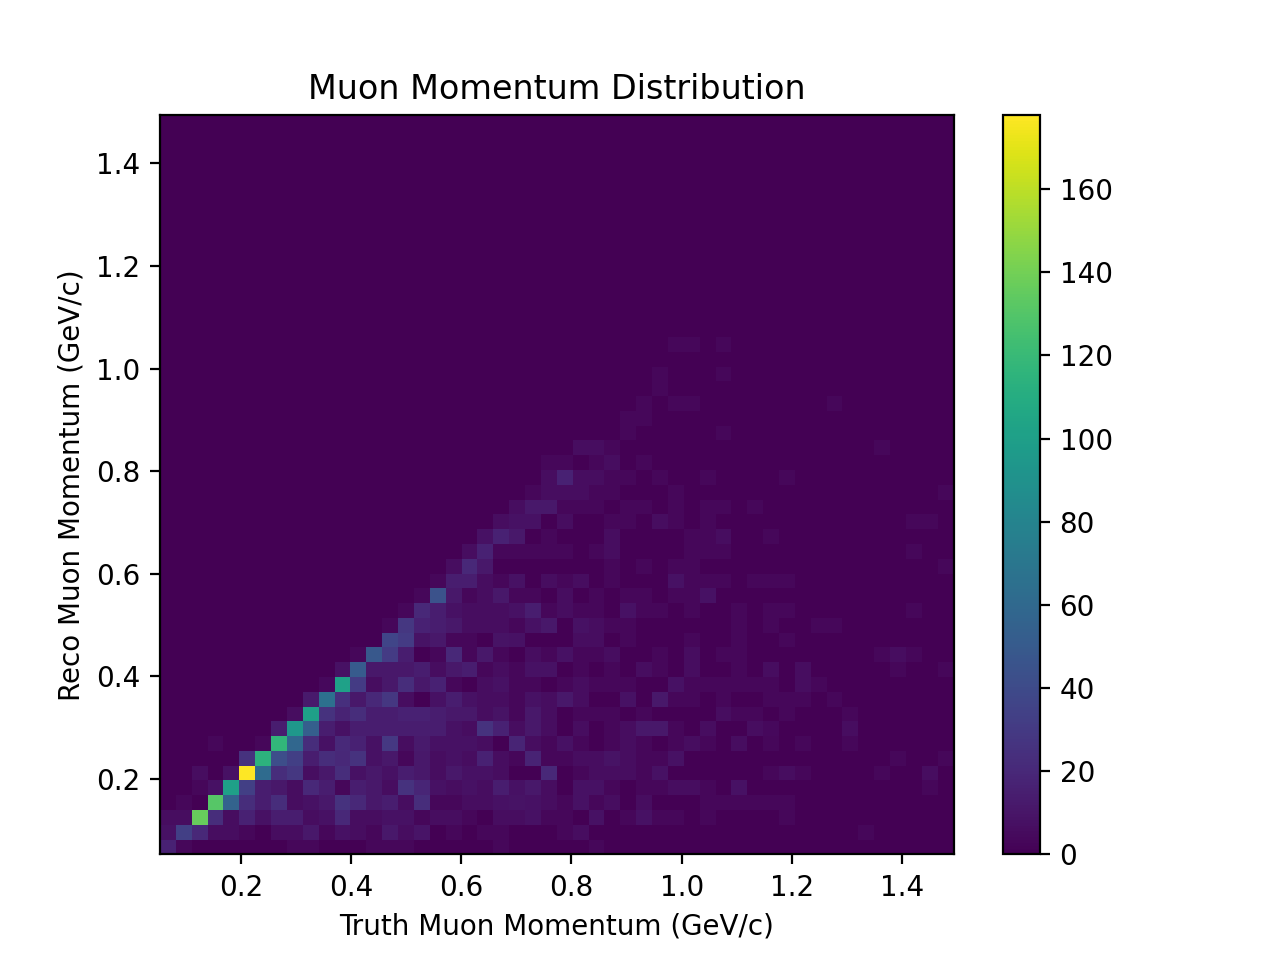

In [27]:
# muons 2d plot

# Create the figure and axis
fig, ax = plt.subplots()

# Define edges for the histogram bins
numberBins = 50

maxTruth = np.max(passedTruthMomMu_arr)
maxReco = np.max(passedRecoMomMu_arr)
maxRange = maxReco if maxReco > maxTruth else maxTruth

minTruth = np.min(passedTruthMomMu_arr)
minReco = np.min(passedRecoMomMu_arr)
minRange = minReco if minReco < minTruth else minTruth

binEdgeRange = (minRange, maxRange)

countsTrue, binsTrue = np.histogram(passedTruthMomMu_arr, bins=numberBins, weights=passedWeights_arr, range=binEdgeRange)
countsReco, binsReco = np.histogram(passedRecoMomMu_arr, bins=numberBins, weights=passedWeights_arr, range=binEdgeRange)


# Create a 2D histogram
hist, xedges, yedges = np.histogram2d(passedTruthMomMu_arr, 
                                       passedRecoMomMu_arr, 
                                       bins=(binsTrue, binsReco), 
                                       weights=passedWeights_arr)

scaledHist = hist*scale

# Create the pcolormesh plot
c = ax.pcolormesh(xedges, yedges, scaledHist.T, shading='auto')

# Add labels and title
plt.xlabel('Truth Muon Momentum (GeV/c)')
plt.ylabel('Reco Muon Momentum (GeV/c)')
plt.title('Muon Momentum Distribution')

# Add a colorbar
cbar = plt.colorbar(c, ax=ax)
#cbar.set_label('Counts')

# Show the plot
plt.show()

<IPython.core.display.Javascript object>


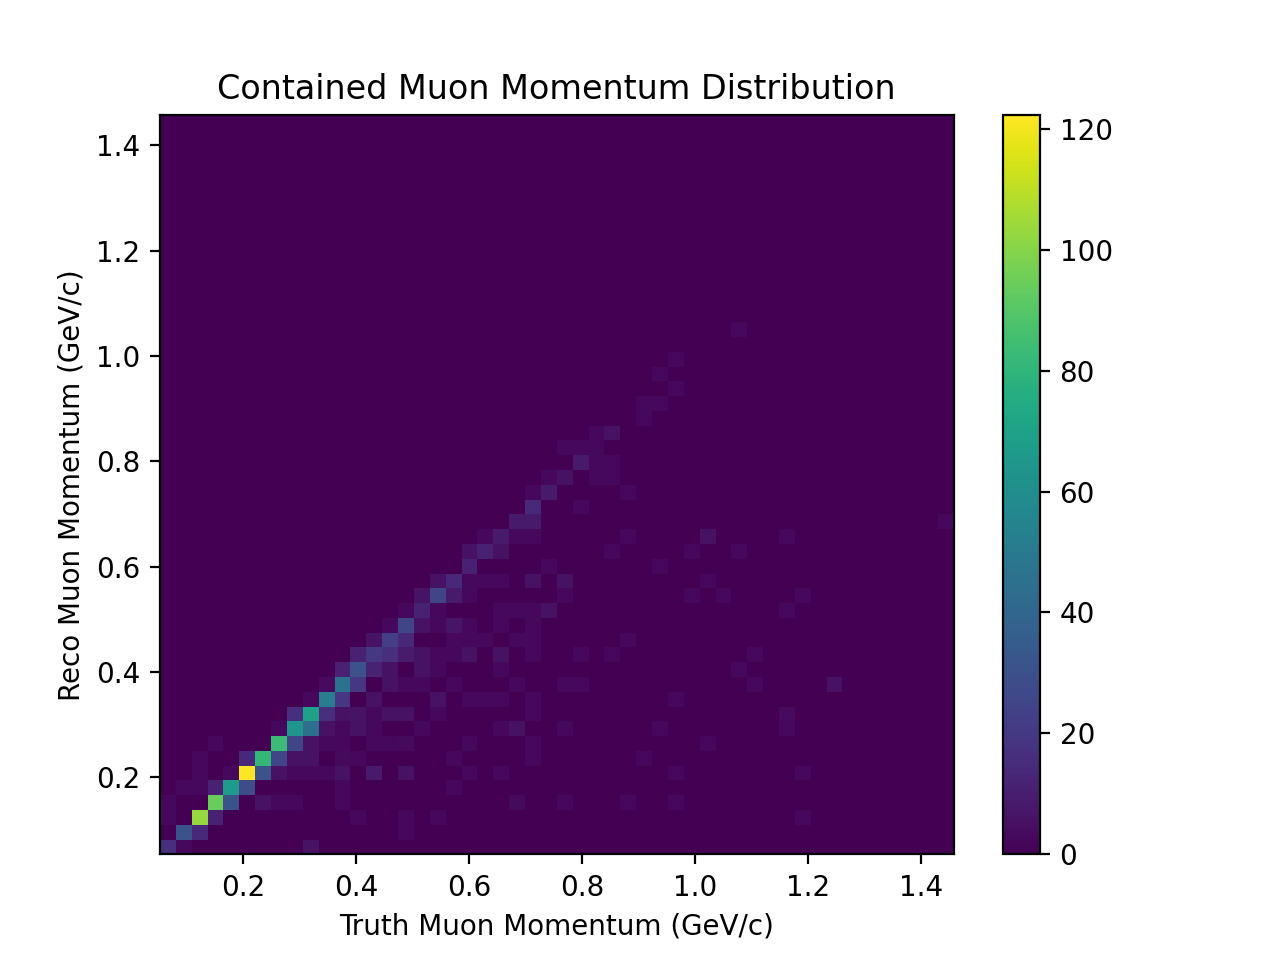

In [28]:
# muons contained 2d plot

# Create the figure and axis
fig, ax = plt.subplots()

# Define edges for the histogram bins
numberBins = 50

maxTruth = np.max(passedTruthMomMuContained_arr)
maxReco = np.max(passedRecoMomMuContained_arr)
maxRange = maxReco if maxReco > maxTruth else maxTruth

minTruth = np.min(passedTruthMomMuContained_arr)
minReco = np.min(passedRecoMomMuContained_arr)
minRange = minReco if minReco < minTruth else minTruth

binEdgeRange = (minRange, maxRange)

countsTrue, binsTrue = np.histogram(passedTruthMomMuContained_arr, bins=numberBins, weights=passedWeightsContained_arr, range=binEdgeRange)
countsReco, binsReco = np.histogram(passedRecoMomMuContained_arr, bins=numberBins, weights=passedWeightsContained_arr, range=binEdgeRange)


# Create a 2D histogram
hist, xedges, yedges = np.histogram2d(passedTruthMomMuContained_arr, 
                                       passedRecoMomMuContained_arr, 
                                       bins=(binsTrue, binsReco), 
                                       weights=passedWeightsContained_arr)

scaledHist = hist*scale

# Create the pcolormesh plot
c = ax.pcolormesh(xedges, yedges, scaledHist.T, shading='auto')

# Add labels and title
plt.xlabel('Truth Muon Momentum (GeV/c)')
plt.ylabel('Reco Muon Momentum (GeV/c)')
plt.title('Contained Muon Momentum Distribution')

# Add a colorbar
cbar = plt.colorbar(c, ax=ax)
#cbar.set_label('Counts')

# Show the plot
plt.show()

## Pions

<IPython.core.display.Javascript object>


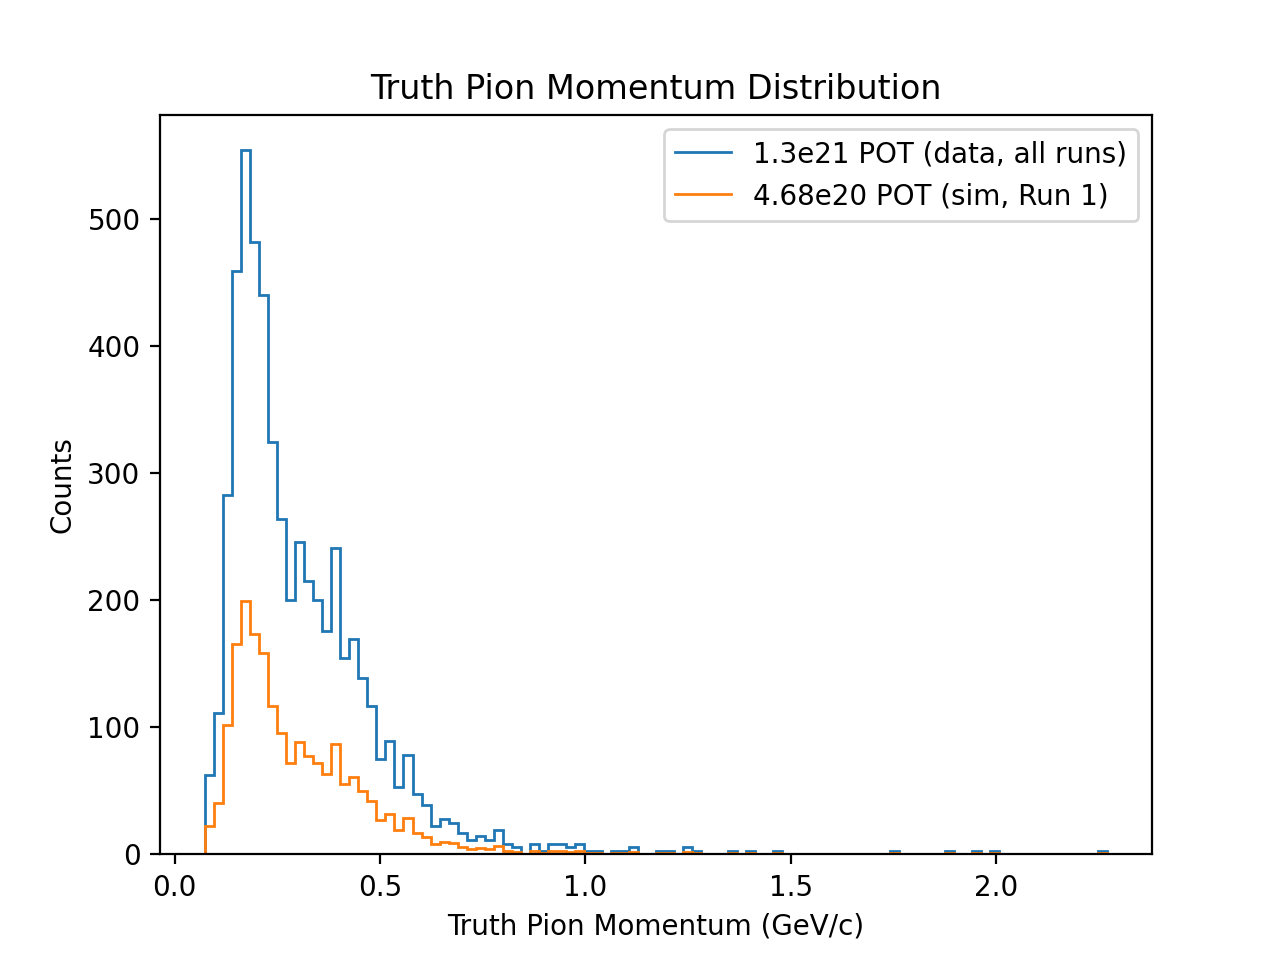

1971.4495310029681
5476.24869723046
1971.4495310029681
5476.24869723046


In [30]:
# plotting only events that passed
# truth pion mom

ax = plt.figure().gca()
ax.yaxis.get_major_locator().set_params(integer=True)

counts, bins = np.histogram(passedTruthMomPi_arr, bins=100, weights=passedWeights_arr)
scaledCounts = counts*scale

print(sum(counts))
print(sum(scaledCounts))

plt.stairs(scaledCounts, bins, label="1.3e21 POT (data, all runs)")
plt.stairs(counts, bins, label="4.68e20 POT (sim, Run 1)")

plt.xlabel('Truth Pion Momentum (GeV/c)')
plt.ylabel('Counts')
plt.title('Truth Pion Momentum Distribution')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

print(sum(counts))
print(sum(scaledCounts))

<IPython.core.display.Javascript object>


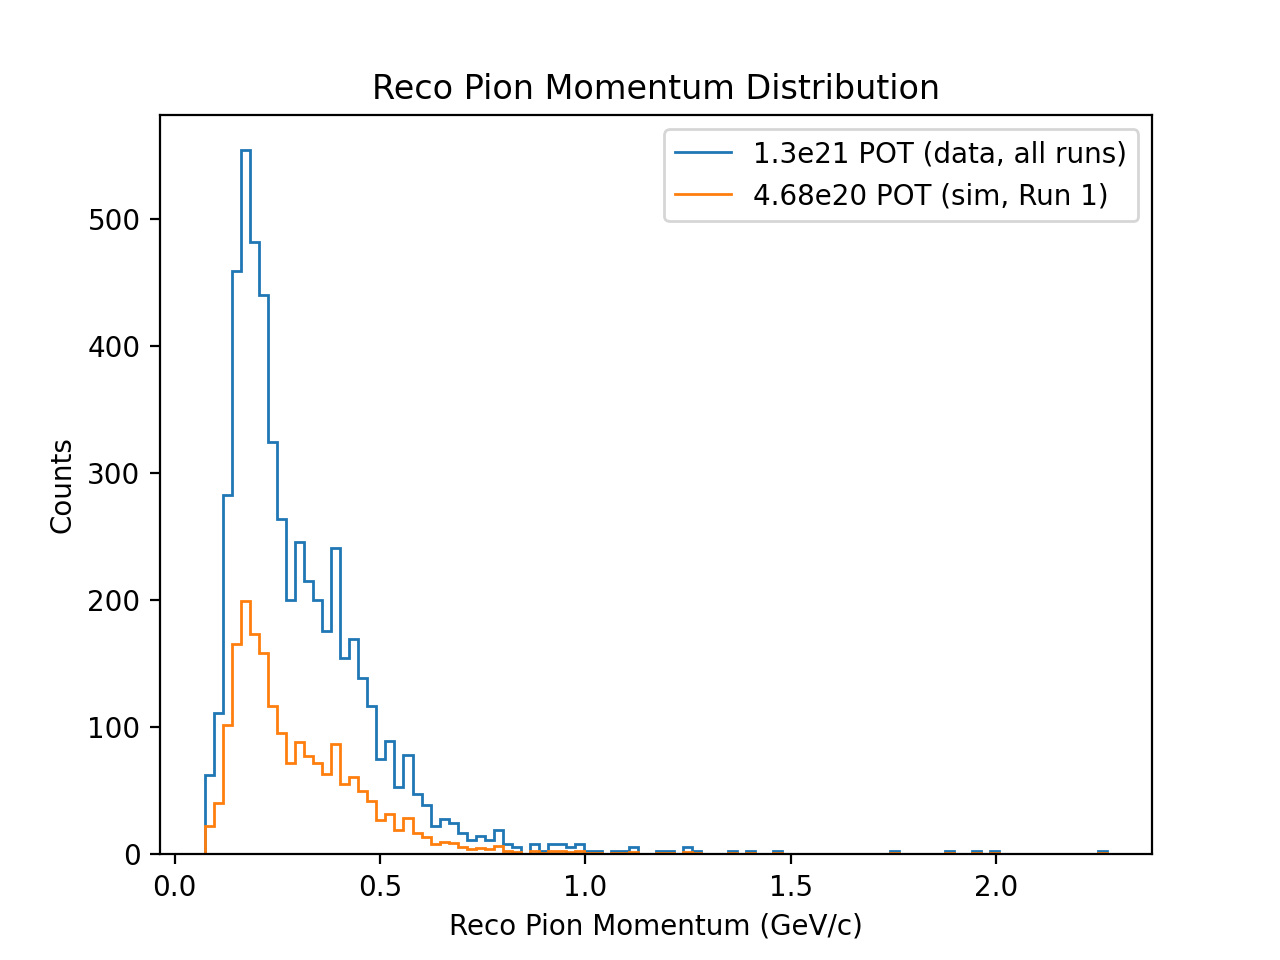

1971.4495310029681
5476.24869723046
1971.4495310029681
5476.24869723046


In [31]:
# plotting only events that passed
# reco pion mom

ax = plt.figure().gca()
ax.yaxis.get_major_locator().set_params(integer=True)

countsPi, binsPi = np.histogram(passedRecoMomPi_arr, bins=100, weights=passedWeights_arr)
scaledCounts = counts*scale

print(sum(counts))
print(sum(scaledCounts))

plt.stairs(scaledCounts, bins, label="1.3e21 POT (data, all runs)")
plt.stairs(counts, bins, label="4.68e20 POT (sim, Run 1)")

plt.xlabel('Reco Pion Momentum (GeV/c)')
plt.ylabel('Counts')
plt.title('Reco Pion Momentum Distribution')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)


print(sum(counts))
print(sum(scaledCounts))

<IPython.core.display.Javascript object>


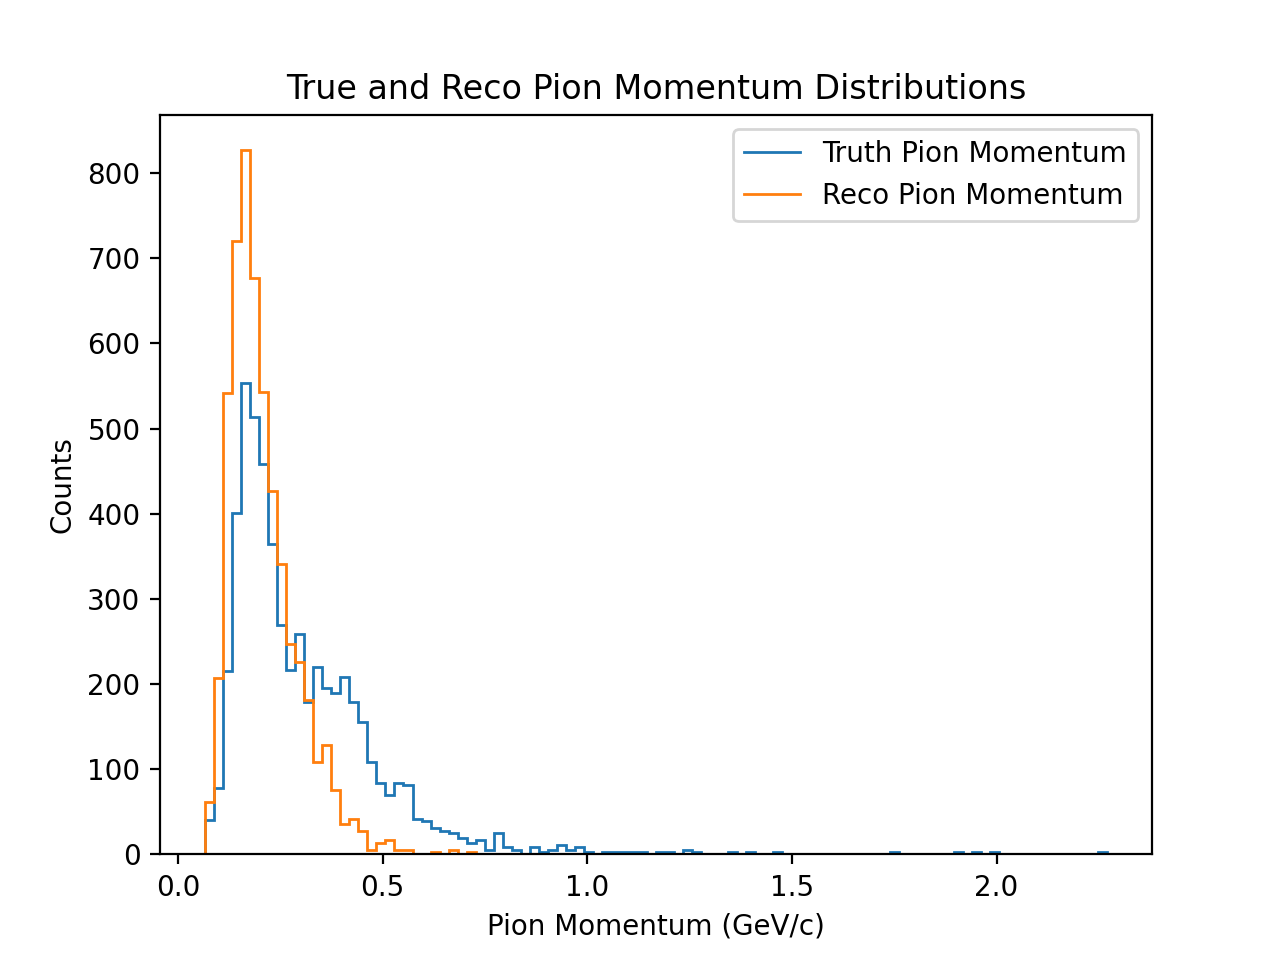

max value of truth:  2.2698229814678412
max value of reco:  0.7268957244058009
maxRange:  2.2698229814678412
Bins truth:  [0.06586529 0.08790487 0.10994445 0.13198402 0.1540236  0.17606318
 0.19810275 0.22014233 0.24218191 0.26422148 0.28626106 0.30830064
 0.33034021 0.35237979 0.37441937 0.39645895 0.41849852 0.4405381
 0.46257768 0.48461725 0.50665683 0.52869641 0.55073598 0.57277556
 0.59481514 0.61685471 0.63889429 0.66093387 0.68297345 0.70501302
 0.7270526  0.74909218 0.77113175 0.79317133 0.81521091 0.83725048
 0.85929006 0.88132964 0.90336921 0.92540879 0.94744837 0.96948794
 0.99152752 1.0135671  1.03560668 1.05764625 1.07968583 1.10172541
 1.12376498 1.14580456 1.16784414 1.18988371 1.21192329 1.23396287
 1.25600244 1.27804202 1.3000816  1.32212118 1.34416075 1.36620033
 1.38823991 1.41027948 1.43231906 1.45435864 1.47639821 1.49843779
 1.52047737 1.54251694 1.56455652 1.5865961  1.60863567 1.63067525
 1.65271483 1.67475441 1.69679398 1.71883356 1.74087314 1.76291271
 1.78495

In [41]:
# pion truth and reco plot for comparison (distributions)

ax = plt.figure().gca()
ax.yaxis.get_major_locator().set_params(integer=True)

# Creating bins (should be same for truth and reco if plotted together)
numberBins = 100

maxTruth = np.max(passedTruthMomPi_arr)
maxReco = np.max(passedRecoMomPi_arr)
maxRange = maxReco if maxReco > maxTruth else maxTruth

minTruth = np.min(passedTruthMomPi_arr)
minReco = np.min(passedRecoMomPi_arr)
minRange = minReco if minReco < minTruth else minTruth

binEdgeRange = (minRange, maxRange)

print("max value of truth: ", maxTruth)
print("max value of reco: ", maxReco)
print("maxRange: ", maxRange)

#------------

countsTrue, binsTrue = np.histogram(passedTruthMomPi_arr, bins=numberBins, range=binEdgeRange, weights=passedWeights_arr)
#countsTrue, binsTrue = np.histogram(passedTruthMomPi_arr, bins=100, weights=passedWeights_arr)
scaledCountsTrue = countsTrue*scale

print("Bins truth: ", binsTrue)


print(sum(countsTrue))
print(sum(scaledCountsTrue))

#countsReco, binsReco = np.histogram(passedRecoMomPi_arr, bins=binsTrue, weights=passedWeights_arr)
countsReco, binsReco = np.histogram(passedRecoMomPi_arr, bins=numberBins, range=binEdgeRange, weights=passedWeights_arr)
scaledCountsReco = countsReco*scale

print("Bins reco: ", binsReco)

print(sum(countsReco))
print(sum(scaledCountsReco))

plt.stairs(scaledCountsTrue, binsTrue, label="Truth Pion Momentum")
plt.stairs(scaledCountsReco, binsReco, label="Reco Pion Momentum")
#plt.stairs(countsPi, binsTrue, label="TEST")

print("scaled counts truth: ", scaledCountsTrue)
print("scaled counts reco: ", scaledCountsReco)

plt.xlabel('Pion Momentum (GeV/c)')
plt.ylabel('Counts')
plt.title('True and Reco Pion Momentum Distributions')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

<IPython.core.display.Javascript object>


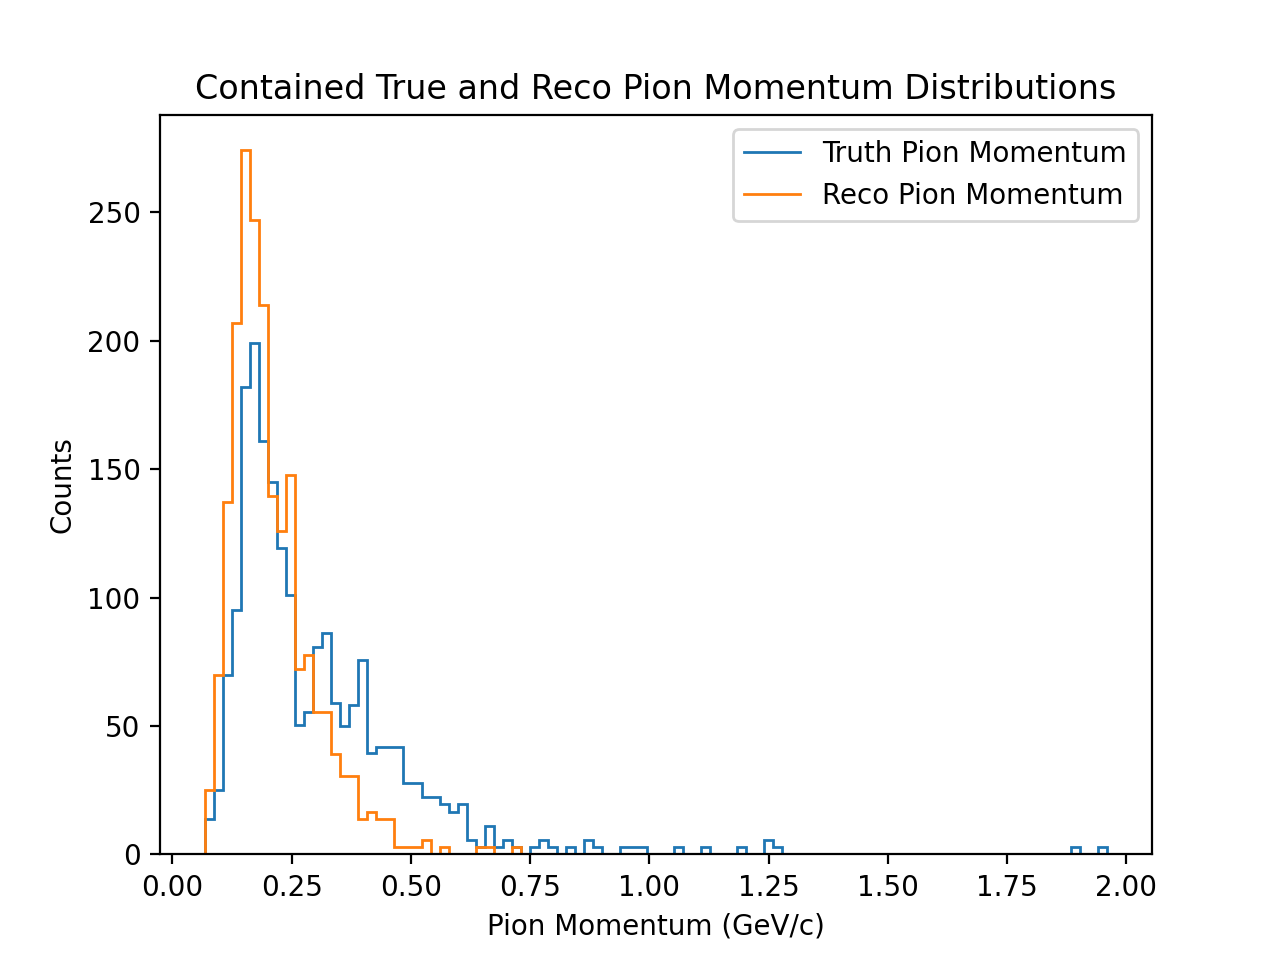

max value of truth:  1.9591692485385577
max value of reco:  0.7268957244058009
maxRange:  1.9591692485385577
731.2149566241326
2031.1526572892585
731.2149566241326
2031.1526572892583


In [33]:
# contained pion truth and reco plot for comparison (distributions)

ax = plt.figure().gca()
ax.yaxis.get_major_locator().set_params(integer=True)

# Creating bins (should be same for truth and reco if plotted together)
numberBins = 100

maxTruth = np.max(passedTruthMomPiContained_arr)
maxReco = np.max(passedRecoMomPiContained_arr)
maxRange = maxReco if maxReco > maxTruth else maxTruth

minTruth = np.min(passedTruthMomPiContained_arr)
minReco = np.min(passedRecoMomPiContained_arr)
minRange = minReco if minReco < minTruth else minTruth

binEdgeRange = (minRange, maxRange)

print("max value of truth: ", maxTruth)
print("max value of reco: ", maxReco)
print("maxRange: ", maxRange)

#------------
countsTrue, binsTrue = np.histogram(passedTruthMomPiContained_arr, bins=numberBins, weights=passedWeightsContained_arr, range=binEdgeRange)
scaledCountsTrue = countsTrue*scale

print(sum(countsTrue))
print(sum(scaledCountsTrue))

# Note that here, I pass in the bins from the truth distrib above, so they are binned the same
countsReco, binsReco = np.histogram(passedRecoMomPiContained_arr, bins=numberBins, weights=passedWeightsContained_arr, range=binEdgeRange)
scaledCountsReco = countsReco*scale

print(sum(countsReco))
print(sum(scaledCountsReco))

plt.stairs(scaledCountsTrue, binsTrue, label="Truth Pion Momentum")
plt.stairs(scaledCountsReco, binsReco, label="Reco Pion Momentum")

plt.xlabel('Pion Momentum (GeV/c)')
plt.ylabel('Counts')
plt.title('Contained True and Reco Pion Momentum Distributions')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

<IPython.core.display.Javascript object>


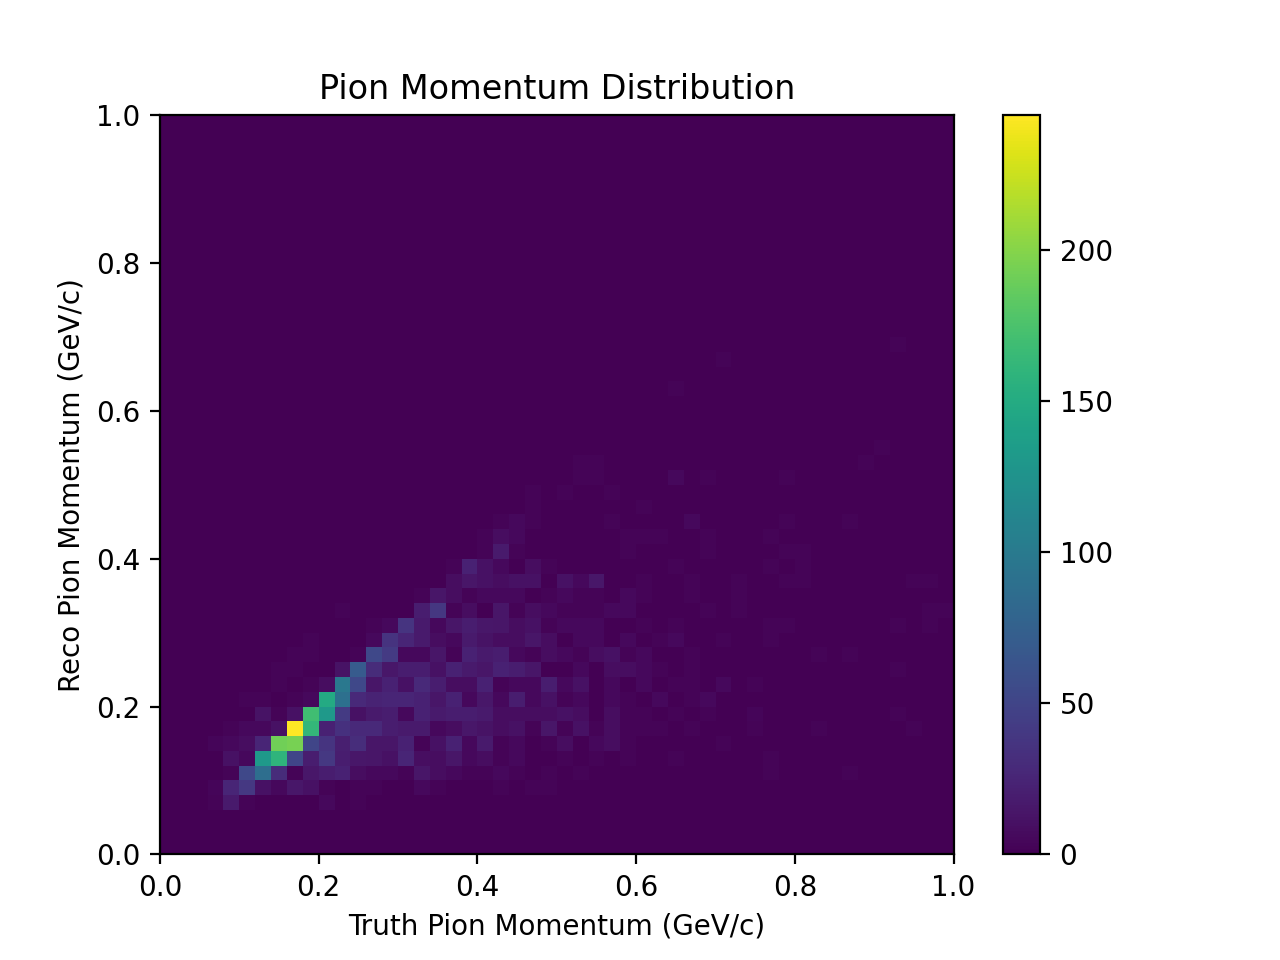

In [55]:
# pions 2d plot

# Create the figure and axis
fig, ax = plt.subplots()

# Define edges for the histogram bins
numberBins = 50

#maxTruth = np.max(passedTruthMomPi_arr)
#maxReco = np.max(passedRecoMomPi_arr)
#maxRange = maxReco if maxReco > maxTruth else maxTruth
maxRange = 1.0

#minTruth = np.min(passedTruthMomPi_arr)
#minReco = np.min(passedRecoMomPi_arr)
#minRange = minReco if minReco < minTruth else minTruth
minRange= 0.0

binEdgeRange = (minRange, maxRange)

countsTrue, binsTrue = np.histogram(passedTruthMomPi_arr, bins=numberBins, weights=passedWeights_arr, range=binEdgeRange)
countsReco, binsReco = np.histogram(passedRecoMomPi_arr, bins=numberBins, weights=passedWeights_arr, range=binEdgeRange)


# Create a 2D histogram
hist, xedges, yedges = np.histogram2d(passedTruthMomPi_arr, 
                                       passedRecoMomPi_arr, 
                                       bins=(binsTrue, binsReco), 
                                       weights=passedWeights_arr)

scaledHist = hist*scale

# Create the pcolormesh plot
c = ax.pcolormesh(xedges, yedges, scaledHist.T, shading='auto')

# Add labels and title
plt.xlabel('Truth Pion Momentum (GeV/c)')
plt.ylabel('Reco Pion Momentum (GeV/c)')
plt.title('Pion Momentum Distribution')

# Add a colorbar
cbar = plt.colorbar(c, ax=ax)
#cbar.set_label('Counts')

# Show the plot
plt.show()

<IPython.core.display.Javascript object>


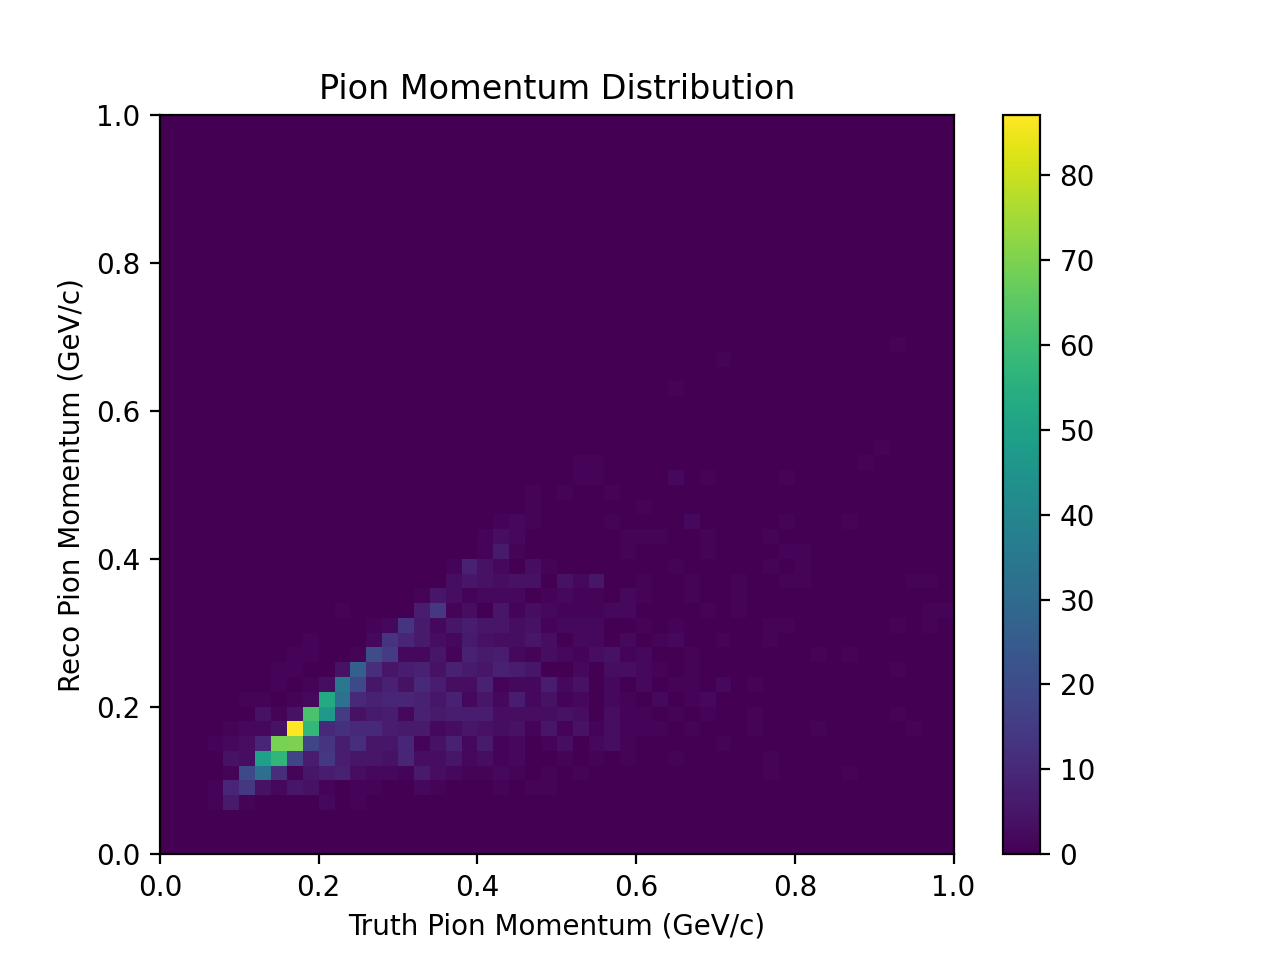

In [34]:
# OLD pion 2d plot (DON'T USE, no scaling or proper binning, POT weighting)

fig, ax = plt.subplots()

h = ax.hist2d(passedTruthMomPi_arr, passedRecoMomPi_arr, bins = 50, range=[[0.,1.0],[0., 1.0]])
plt.xlabel('Truth Pion Momentum (GeV/c)')
plt.ylabel('Reco Pion Momentum (GeV/c)')
plt.title('Pion Momentum Distribution')
fig.colorbar(h[3], ax=ax)

# plt.show()

<IPython.core.display.Javascript object>


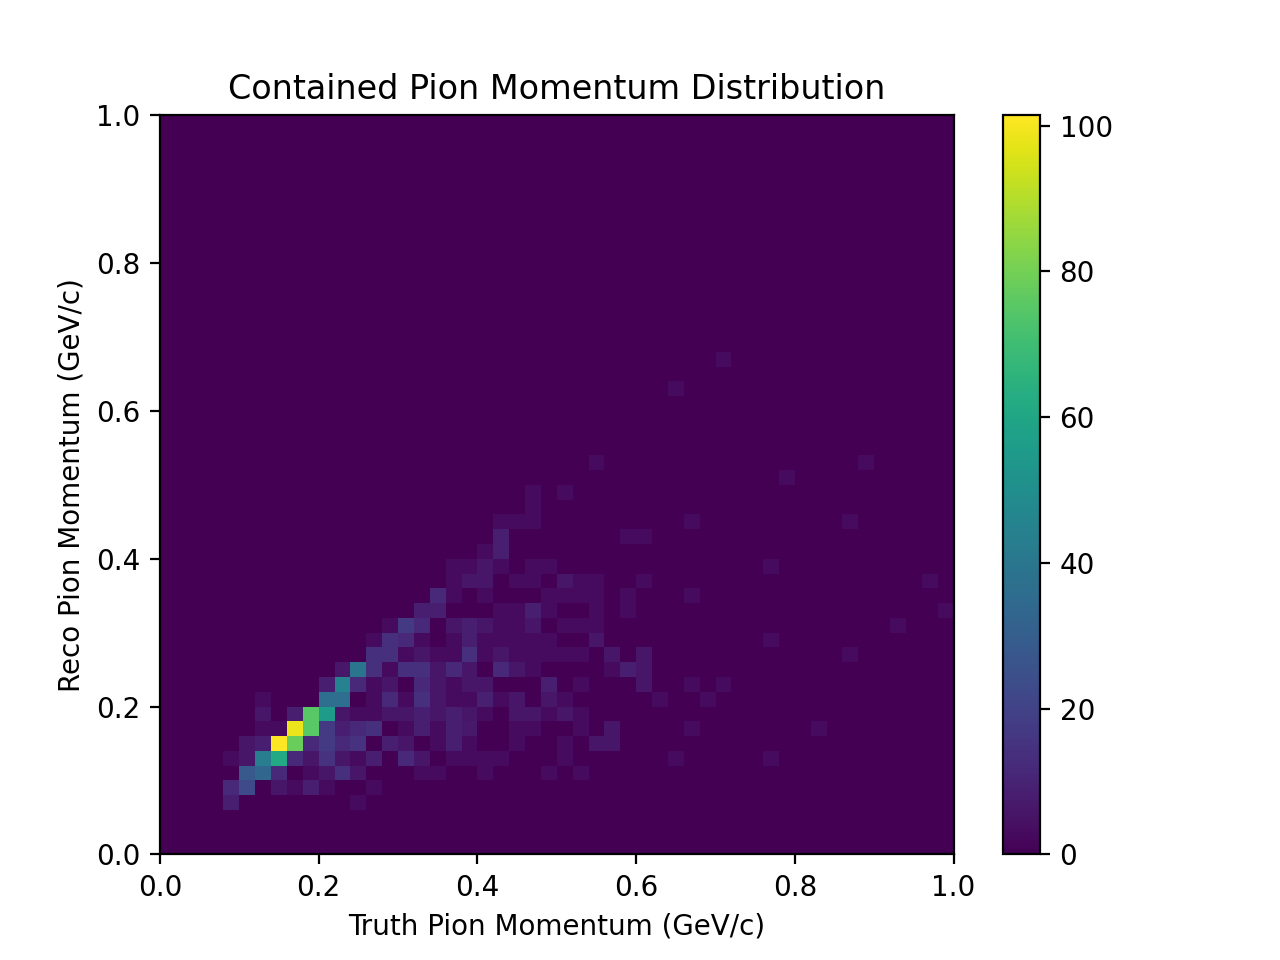

In [54]:
# contained pions 2d plot

# Create the figure and axis
fig, ax = plt.subplots()

# Define edges for the histogram bins
numberBins = 50

#maxTruth = np.max(passedTruthMomPi_arr)
#maxReco = np.max(passedRecoMomPi_arr)
#maxRange = maxReco if maxReco > maxTruth else maxTruth
maxRange = 1.0

#minTruth = np.min(passedTruthMomPi_arr)
#minReco = np.min(passedRecoMomPi_arr)
#minRange = minReco if minReco < minTruth else minTruth
minRange= 0.0

binEdgeRange = (minRange, maxRange)

countsTrue, binsTrue = np.histogram(passedTruthMomPiContained_arr, bins=numberBins, weights=passedWeightsContained_arr, range=binEdgeRange)
countsReco, binsReco = np.histogram(passedRecoMomPiContained_arr, bins=numberBins, weights=passedWeightsContained_arr, range=binEdgeRange)


# Create a 2D histogram
hist, xedges, yedges = np.histogram2d(passedTruthMomPiContained_arr, 
                                       passedRecoMomPiContained_arr, 
                                       bins=(binsTrue, binsReco), 
                                       weights=passedWeightsContained_arr)

scaledHist = hist*scale

# Create the pcolormesh plot
c = ax.pcolormesh(xedges, yedges, scaledHist.T, shading='auto')

# Add labels and title
plt.xlabel('Truth Pion Momentum (GeV/c)')
plt.ylabel('Reco Pion Momentum (GeV/c)')
plt.title('Contained Pion Momentum Distribution')

# Add a colorbar
cbar = plt.colorbar(c, ax=ax)
#cbar.set_label('Counts')

# Show the plot
plt.show()

<IPython.core.display.Javascript object>


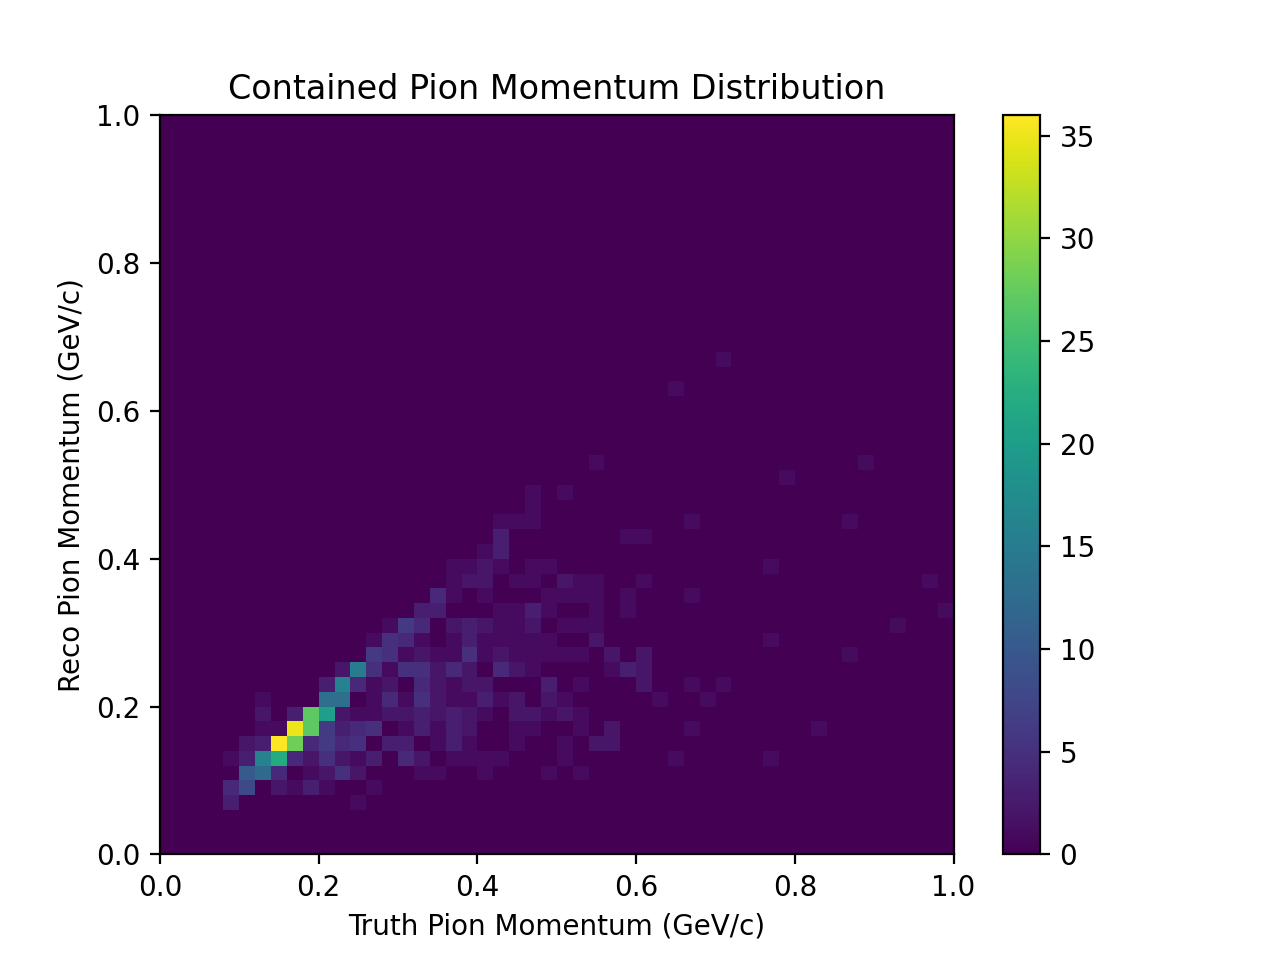

In [44]:
# OLD contained pion 2d plot (DON'T USE, no scaling or proper binning, POT weighting)

fig, ax = plt.subplots()

h = ax.hist2d(passedTruthMomPiContained_arr, passedRecoMomPiContained_arr, bins = 50, range=[[0.,1.0],[0., 1.0]])
plt.xlabel('Truth Pion Momentum (GeV/c)')
plt.ylabel('Reco Pion Momentum (GeV/c)')
plt.title('Contained Pion Momentum Distribution')
fig.colorbar(h[3], ax=ax)

# plt.show()

## Leading Protons

<IPython.core.display.Javascript object>


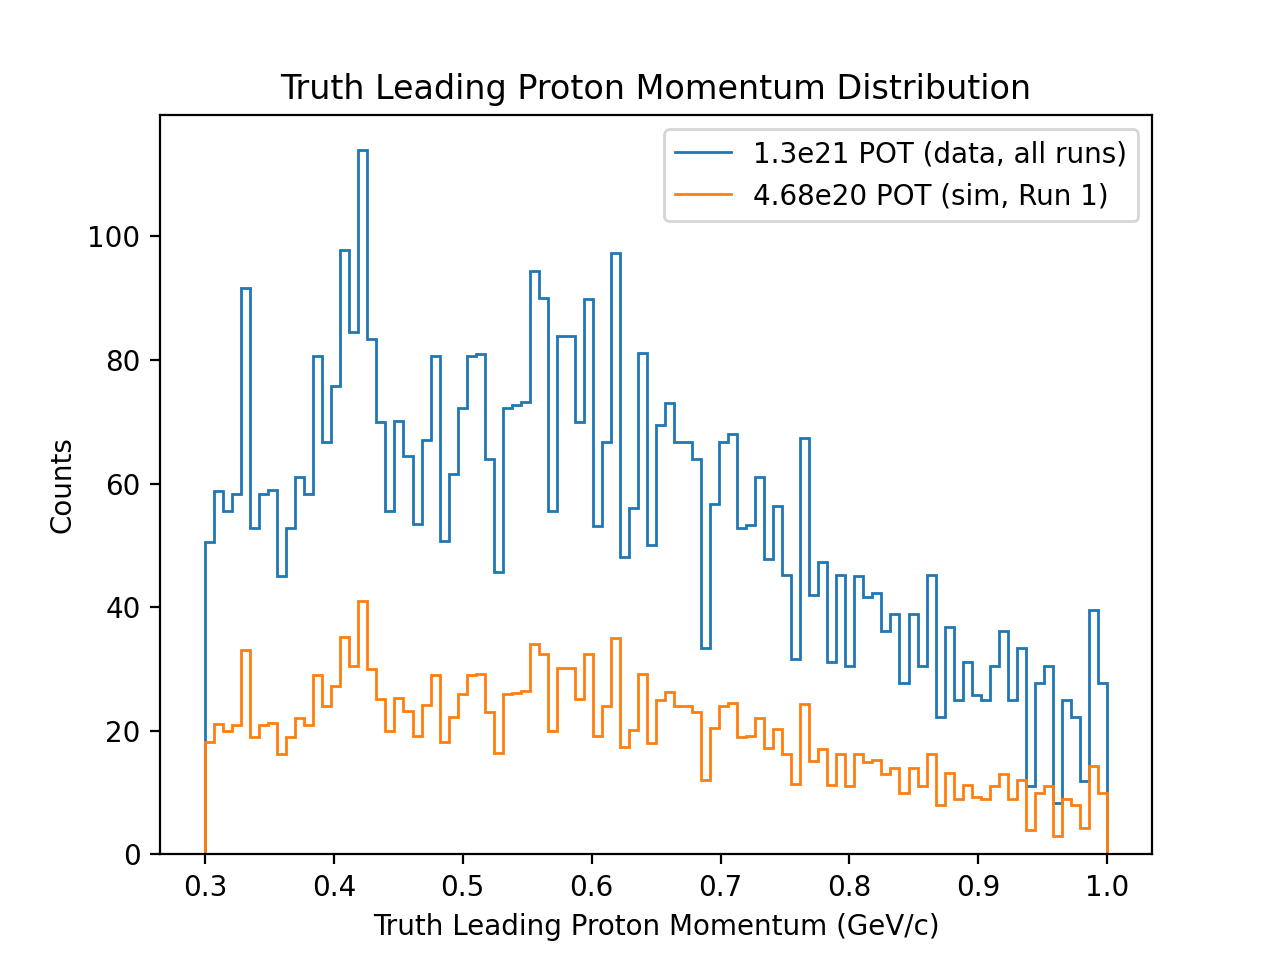

2.7777777777777777
1971.4495310029683
5476.248697230466


In [45]:
# plotting only events that passed
# truth leading proton mom

ax = plt.figure().gca()
ax.yaxis.get_major_locator().set_params(integer=True)

counts, bins = np.histogram(passedTruthMomLP_arr, bins=100, weights=passedWeights_arr)
scaledCounts = counts*scale
print(scale)

plt.stairs(scaledCounts, bins, label="1.3e21 POT (data, all runs)")
plt.stairs(counts, bins, label="4.68e20 POT (sim, Run 1)")

plt.xlabel('Truth Leading Proton Momentum (GeV/c)')
plt.ylabel('Counts')
plt.title('Truth Leading Proton Momentum Distribution')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

print(sum(counts))
print(sum(scaledCounts))

<IPython.core.display.Javascript object>


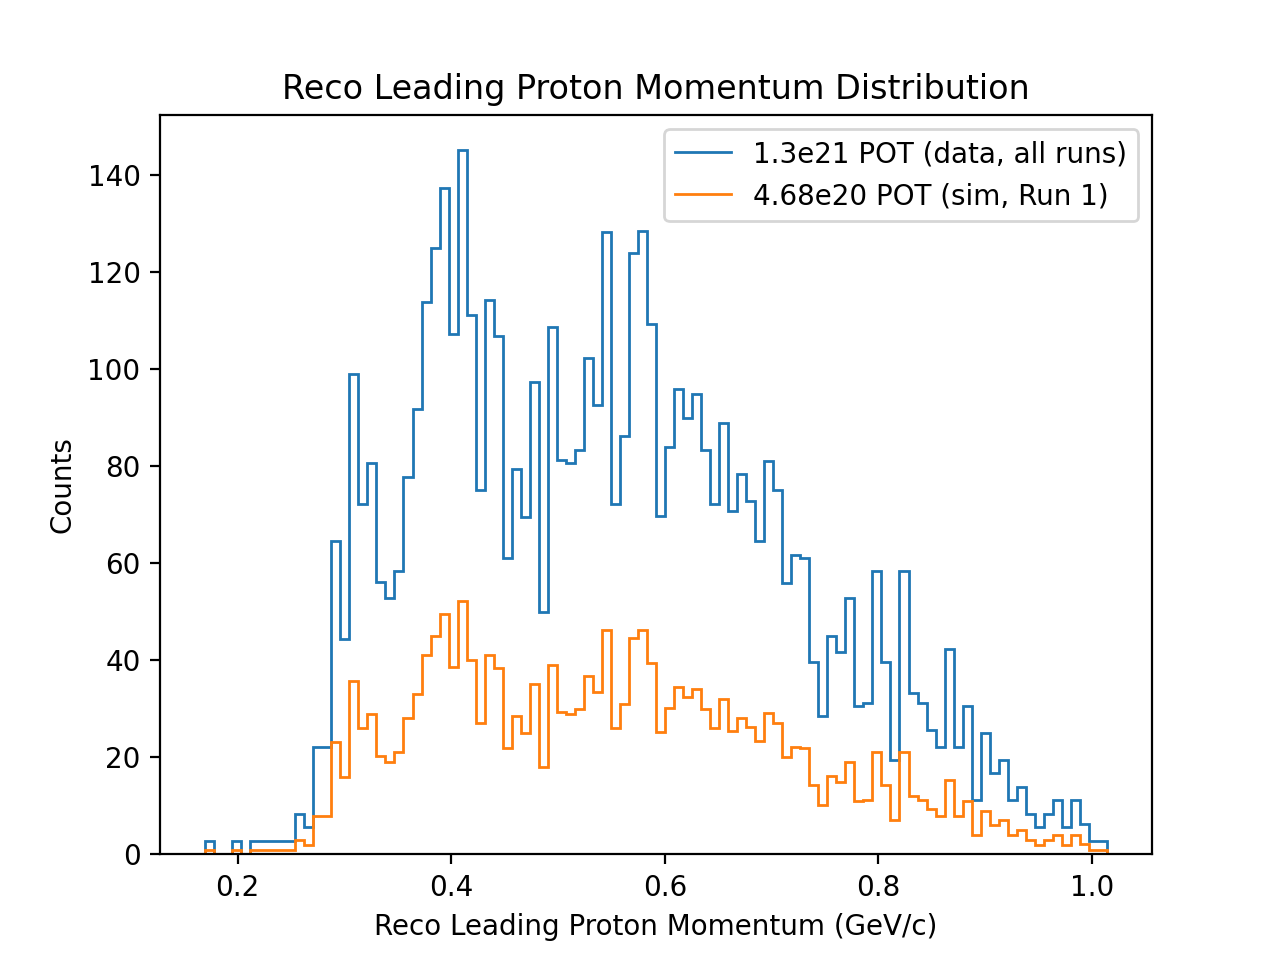

2.7777777777777777
1971.4495310029683
5476.248697230468


In [46]:
# plotting only events that passed
# reco leading proton mom

ax = plt.figure().gca()
ax.yaxis.get_major_locator().set_params(integer=True)

counts, bins = np.histogram(passedRecoMomLP_arr, bins=100, weights=passedWeights_arr)
scaledCounts = counts*scale
print(scale)

plt.stairs(scaledCounts, bins, label="1.3e21 POT (data, all runs)")
plt.stairs(counts, bins, label="4.68e20 POT (sim, Run 1)")

plt.xlabel('Reco Leading Proton Momentum (GeV/c)')
plt.ylabel('Counts')
plt.title('Reco Leading Proton Momentum Distribution')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

print(sum(counts))
print(sum(scaledCounts))

<IPython.core.display.Javascript object>


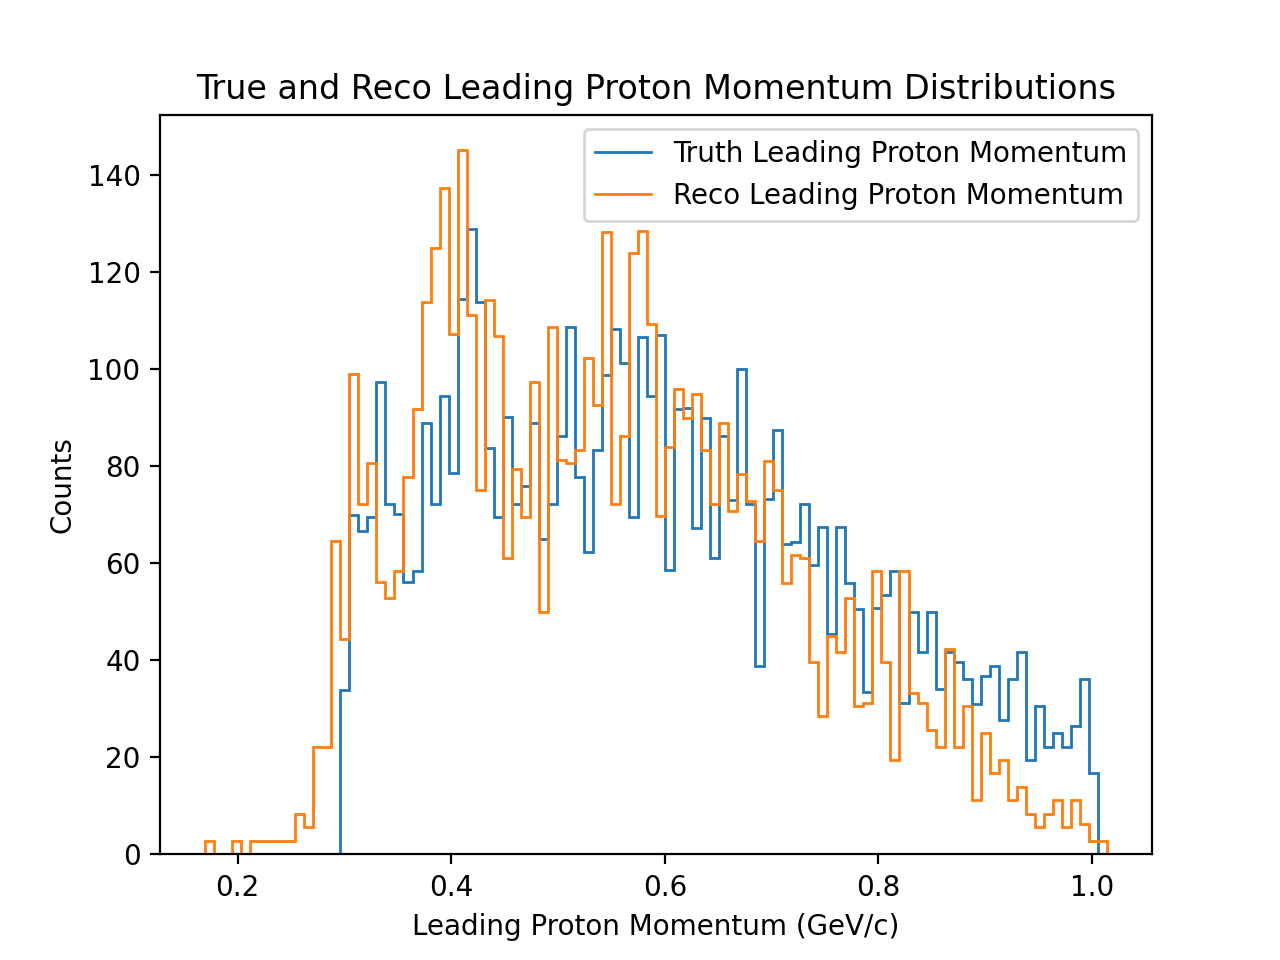

max value of truth:  0.9996885315347095
max value of reco:  1.0139445749471674
maxRange:  1.0139445749471674
binsTruth [0.16943023 0.17787537 0.18632052 0.19476566 0.2032108  0.21165595
 0.22010109 0.22854623 0.23699138 0.24543652 0.25388166 0.26232681
 0.27077195 0.27921709 0.28766224 0.29610738 0.30455252 0.31299767
 0.32144281 0.32988795 0.3383331  0.34677824 0.35522339 0.36366853
 0.37211367 0.38055882 0.38900396 0.3974491  0.40589425 0.41433939
 0.42278453 0.43122968 0.43967482 0.44811996 0.45656511 0.46501025
 0.47345539 0.48190054 0.49034568 0.49879082 0.50723597 0.51568111
 0.52412625 0.5325714  0.54101654 0.54946168 0.55790683 0.56635197
 0.57479712 0.58324226 0.5916874  0.60013255 0.60857769 0.61702283
 0.62546798 0.63391312 0.64235826 0.65080341 0.65924855 0.66769369
 0.67613884 0.68458398 0.69302912 0.70147427 0.70991941 0.71836455
 0.7268097  0.73525484 0.74369998 0.75214513 0.76059027 0.76903541
 0.77748056 0.7859257  0.79437085 0.80281599 0.81126113 0.81970628
 0.8281514

In [47]:
# leading proton truth and reco plot for comparison (distributions)

ax = plt.figure().gca()
ax.yaxis.get_major_locator().set_params(integer=True)

# Creating bins (should be same for truth and reco if plotted together)
numberBins = 100

maxTruth = np.max(passedTruthMomLP_arr)
maxReco = np.max(passedRecoMomLP_arr)
maxRange = maxReco if maxReco > maxTruth else maxTruth

minTruth = np.min(passedTruthMomLP_arr)
minReco = np.min(passedRecoMomLP_arr)
minRange = minReco if minReco < minTruth else minTruth

binEdgeRange = (minRange, maxRange)

print("max value of truth: ", maxTruth)
print("max value of reco: ", maxReco)
print("maxRange: ", maxRange)

#----------------

countsTrue, binsTrue = np.histogram(passedTruthMomLP_arr, bins=numberBins, weights=passedWeights_arr, range=binEdgeRange)
scaledCountsTrue = countsTrue*scale

print("binsTruth", binsTrue)
print("sum bins truth: ", sum(countsTrue))
print("sum scaled bins truth: ", sum(scaledCountsTrue))

# Note that here, I pass in the bins from the truth distrib above, so they are binned the same
countsReco, binsReco = np.histogram(passedRecoMomLP_arr, bins=numberBins, weights=passedWeights_arr, range=binEdgeRange)
scaledCountsReco = countsReco*scale

print("binsReco", binsReco)
print("sum bins reco: ", sum(countsReco))
print("sum scaled bins reco: ", sum(scaledCountsReco))

plt.stairs(scaledCountsTrue, binsTrue, label="Truth Leading Proton Momentum")
plt.stairs(scaledCountsReco, binsReco, label="Reco Leading Proton Momentum")

print(all(binsTrue == binsReco))

plt.xlabel('Leading Proton Momentum (GeV/c)')
plt.ylabel('Counts')
plt.title('True and Reco Leading Proton Momentum Distributions')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

/tmp/ipykernel_7102/1768633470.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  ax = plt.figure().gca()


<IPython.core.display.Javascript object>


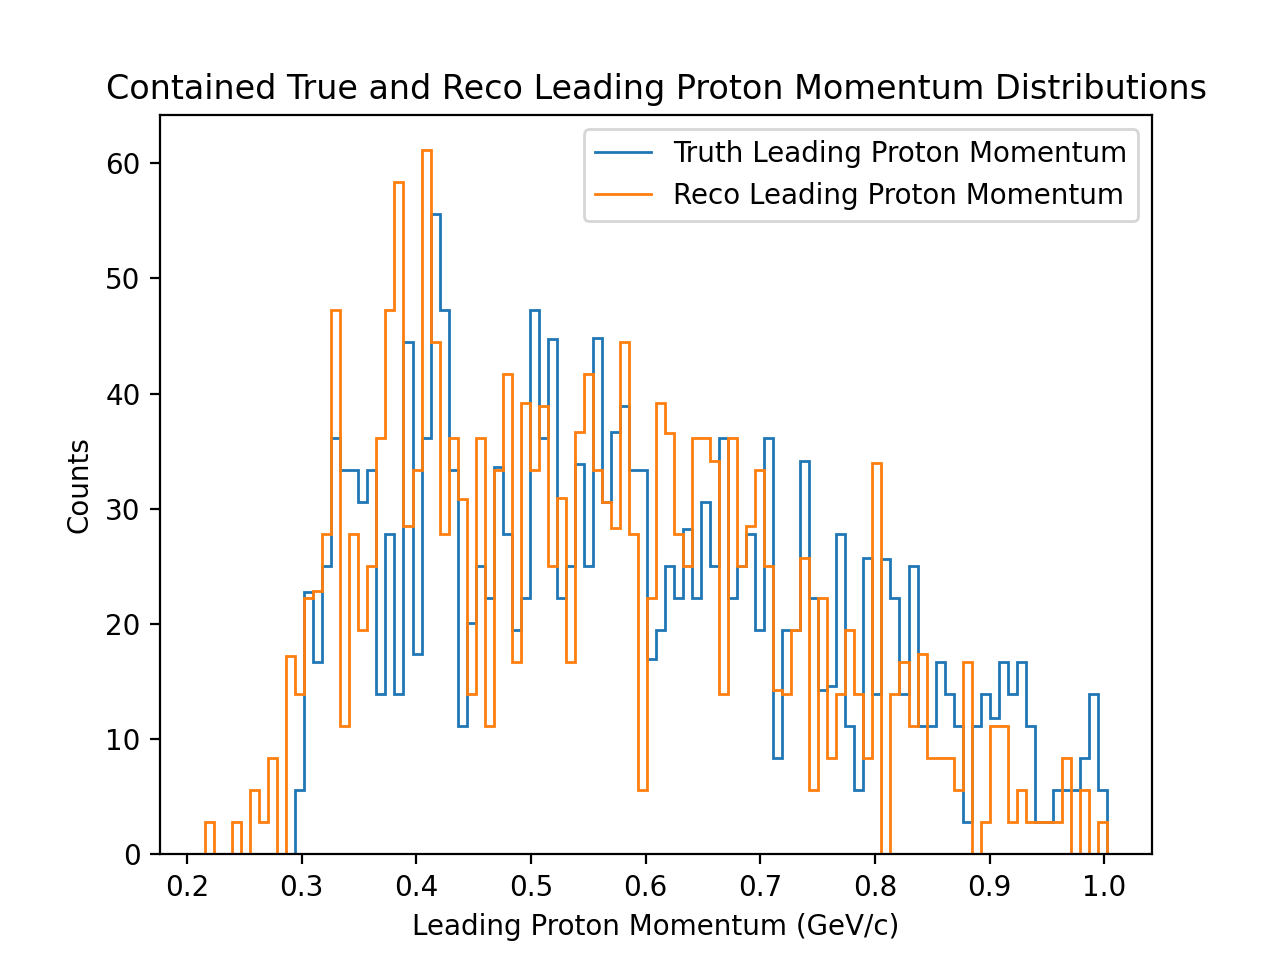

max value of truth:  0.9996885315347095
max value of reco:  1.0023436815442892
maxRange:  1.0023436815442892
binsTruth [0.2157802  0.22364584 0.23151147 0.23937711 0.24724274 0.25510838
 0.26297401 0.27083965 0.27870528 0.28657092 0.29443655 0.30230218
 0.31016782 0.31803345 0.32589909 0.33376472 0.34163036 0.34949599
 0.35736163 0.36522726 0.3730929  0.38095853 0.38882417 0.3966898
 0.40455544 0.41242107 0.42028671 0.42815234 0.43601798 0.44388361
 0.45174925 0.45961488 0.46748052 0.47534615 0.48321179 0.49107742
 0.49894305 0.50680869 0.51467432 0.52253996 0.53040559 0.53827123
 0.54613686 0.5540025  0.56186813 0.56973377 0.5775994  0.58546504
 0.59333067 0.60119631 0.60906194 0.61692758 0.62479321 0.63265885
 0.64052448 0.64839012 0.65625575 0.66412139 0.67198702 0.67985265
 0.68771829 0.69558392 0.70344956 0.71131519 0.71918083 0.72704646
 0.7349121  0.74277773 0.75064337 0.758509   0.76637464 0.77424027
 0.78210591 0.78997154 0.79783718 0.80570281 0.81356845 0.82143408
 0.82929972

In [48]:
# contained leading proton truth and reco plot for comparison (distributions)

ax = plt.figure().gca()
ax.yaxis.get_major_locator().set_params(integer=True)

# Creating bins (should be same for truth and reco if plotted together)
numberBins = 100

maxTruth = np.max(passedTruthMomLPContained_arr)
maxReco = np.max(passedRecoMomLPContained_arr)
maxRange = maxReco if maxReco > maxTruth else maxTruth

minTruth = np.min(passedTruthMomLPContained_arr)
minReco = np.min(passedRecoMomLPContained_arr)
minRange = minReco if minReco < minTruth else minTruth

binEdgeRange = (minRange, maxRange)

print("max value of truth: ", maxTruth)
print("max value of reco: ", maxReco)
print("maxRange: ", maxRange)

#----------------

countsTrue, binsTrue = np.histogram(passedTruthMomLPContained_arr, bins=numberBins, weights=passedWeightsContained_arr, range=binEdgeRange)
scaledCountsTrue = countsTrue*scale

print("binsTruth", binsTrue)
print("sum bins truth: ", sum(countsTrue))
print("sum scaled bins truth: ", sum(scaledCountsTrue))

# Note that here, I pass in the bins from the truth distrib above, so they are binned the same
countsReco, binsReco = np.histogram(passedRecoMomLPContained_arr, bins=numberBins, weights=passedWeightsContained_arr, range=binEdgeRange)
scaledCountsReco = countsReco*scale

print("binsReco", binsReco)
print("sum bins reco: ", sum(countsReco))
print("sum scaled bins reco: ", sum(scaledCountsReco))

plt.stairs(scaledCountsTrue, binsTrue, label="Truth Leading Proton Momentum")
plt.stairs(scaledCountsReco, binsTrue, label="Reco Leading Proton Momentum")

plt.xlabel('Leading Proton Momentum (GeV/c)')
plt.ylabel('Counts')
plt.title('Contained True and Reco Leading Proton Momentum Distributions')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

<IPython.core.display.Javascript object>


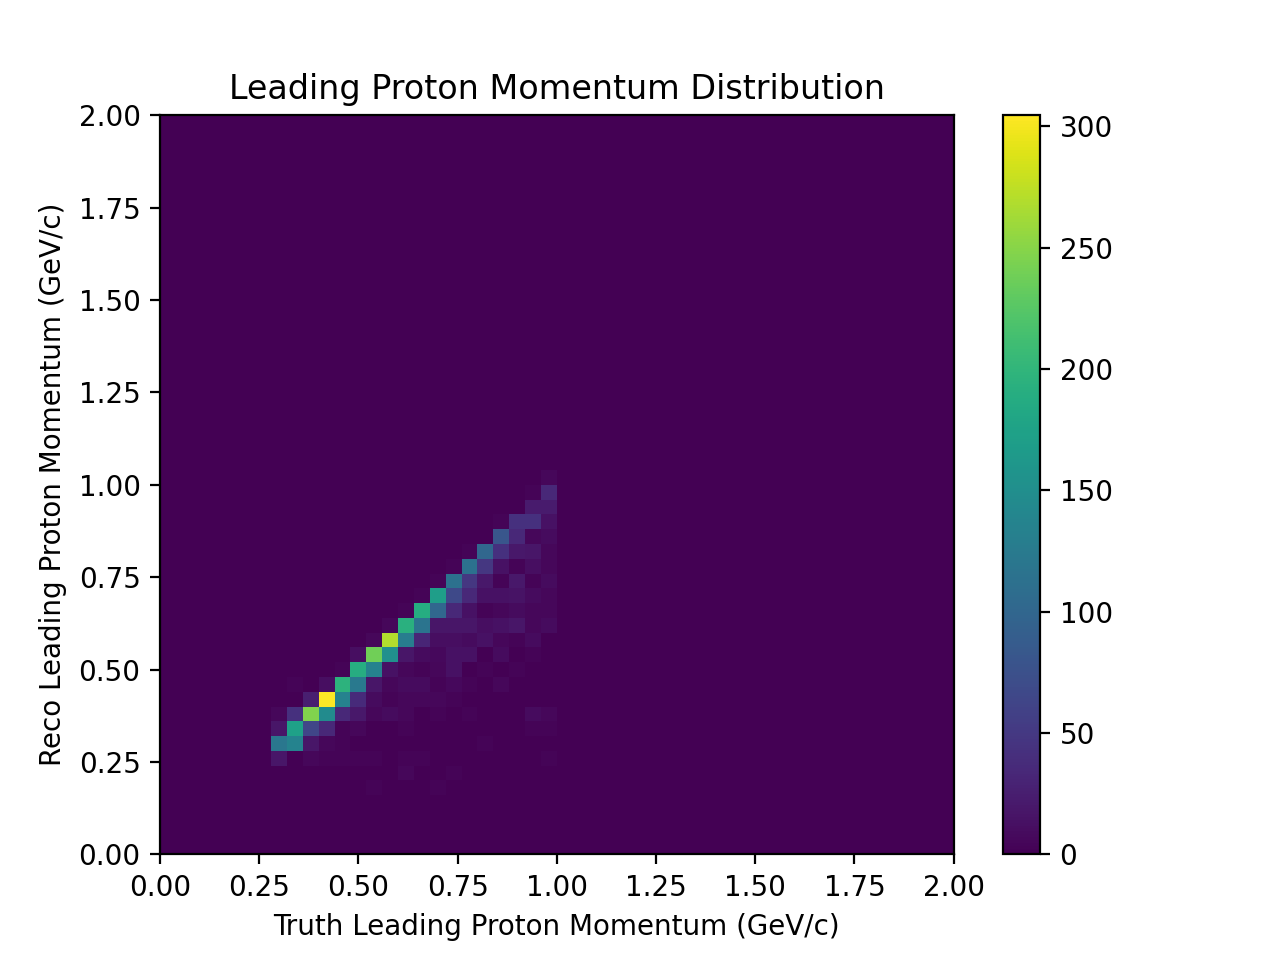

In [51]:
# leading proton 2d plot

# Create the figure and axis
fig, ax = plt.subplots()

# Define edges for the histogram bins
numberBins = 50

#maxTruth = np.max(passedTruthMomPi_arr)
#maxReco = np.max(passedRecoMomPi_arr)
#maxRange = maxReco if maxReco > maxTruth else maxTruth
maxRange = 2.0

#minTruth = np.min(passedTruthMomPi_arr)
#minReco = np.min(passedRecoMomPi_arr)
#minRange = minReco if minReco < minTruth else minTruth
minRange= 0.0

binEdgeRange = (minRange, maxRange)

countsTrue, binsTrue = np.histogram(passedTruthMomLP_arr, bins=numberBins, weights=passedWeights_arr, range=binEdgeRange)
countsReco, binsReco = np.histogram(passedRecoMomLP_arr, bins=numberBins, weights=passedWeights_arr, range=binEdgeRange)


# Create a 2D histogram
hist, xedges, yedges = np.histogram2d(passedTruthMomLP_arr, 
                                       passedRecoMomLP_arr, 
                                       bins=(binsTrue, binsReco), 
                                       weights=passedWeights_arr)

scaledHist = hist*scale

# Create the pcolormesh plot
c = ax.pcolormesh(xedges, yedges, scaledHist.T, shading='auto')

# Add labels and title
plt.xlabel('Truth Leading Proton Momentum (GeV/c)')
plt.ylabel('Reco Leading Proton Momentum (GeV/c)')
plt.title('Leading Proton Momentum Distribution')

# Add a colorbar
cbar = plt.colorbar(c, ax=ax)
#cbar.set_label('Counts')

# Show the plot
plt.show()

<IPython.core.display.Javascript object>


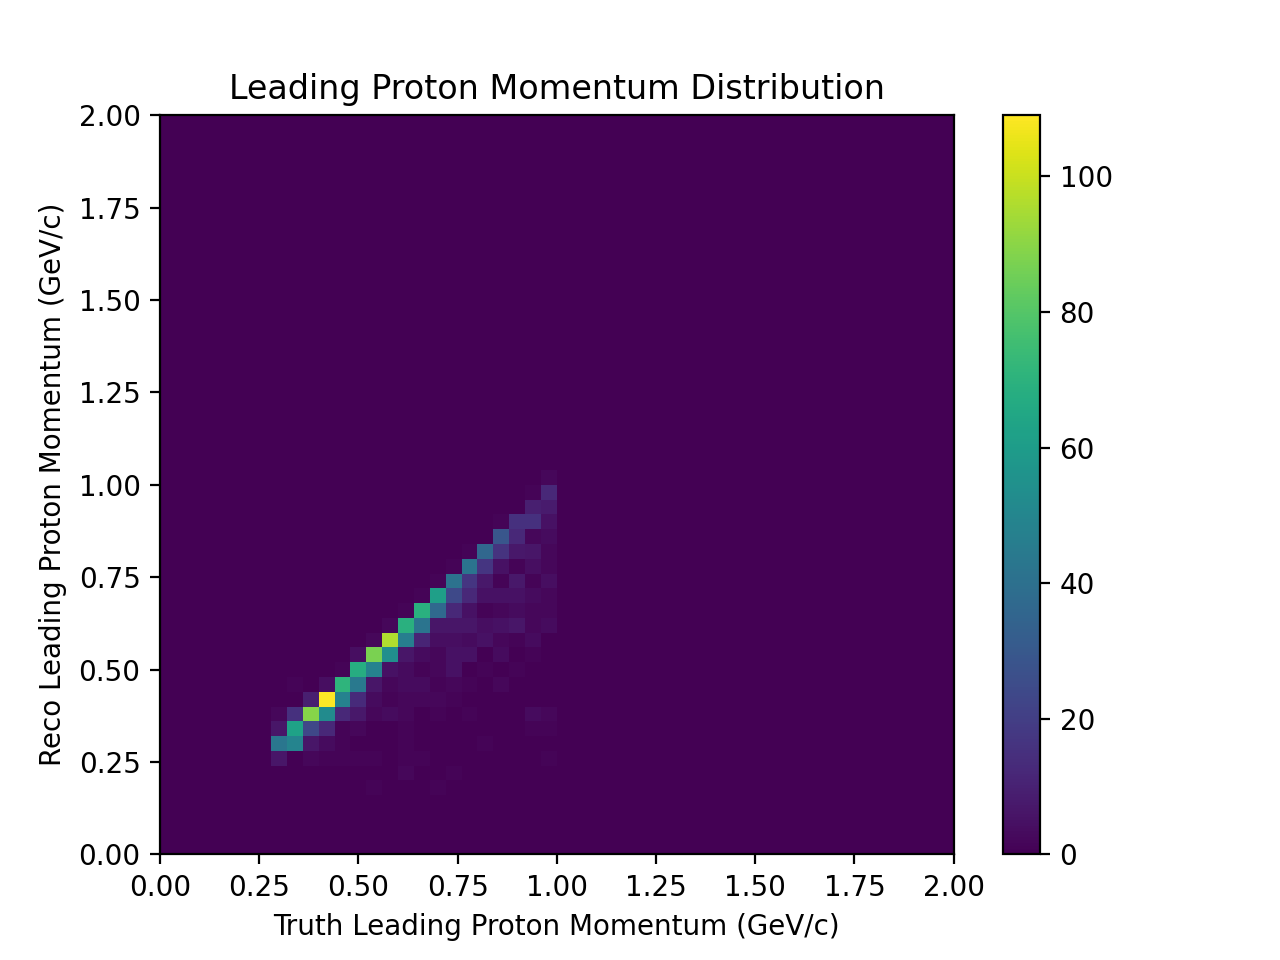

In [50]:
# OLD leading proton 2d plot (DON'T USE, no scaling or proper binning, POT weighting)

fig, ax = plt.subplots()

h = ax.hist2d(passedTruthMomLP_arr, passedRecoMomLP_arr, bins = 50, range=[[0.,2.0],[0., 2.0]])
plt.xlabel('Truth Leading Proton Momentum (GeV/c)')
plt.ylabel('Reco Leading Proton Momentum (GeV/c)')
plt.title('Leading Proton Momentum Distribution')
fig.colorbar(h[3], ax=ax)

# plt.show()

<IPython.core.display.Javascript object>


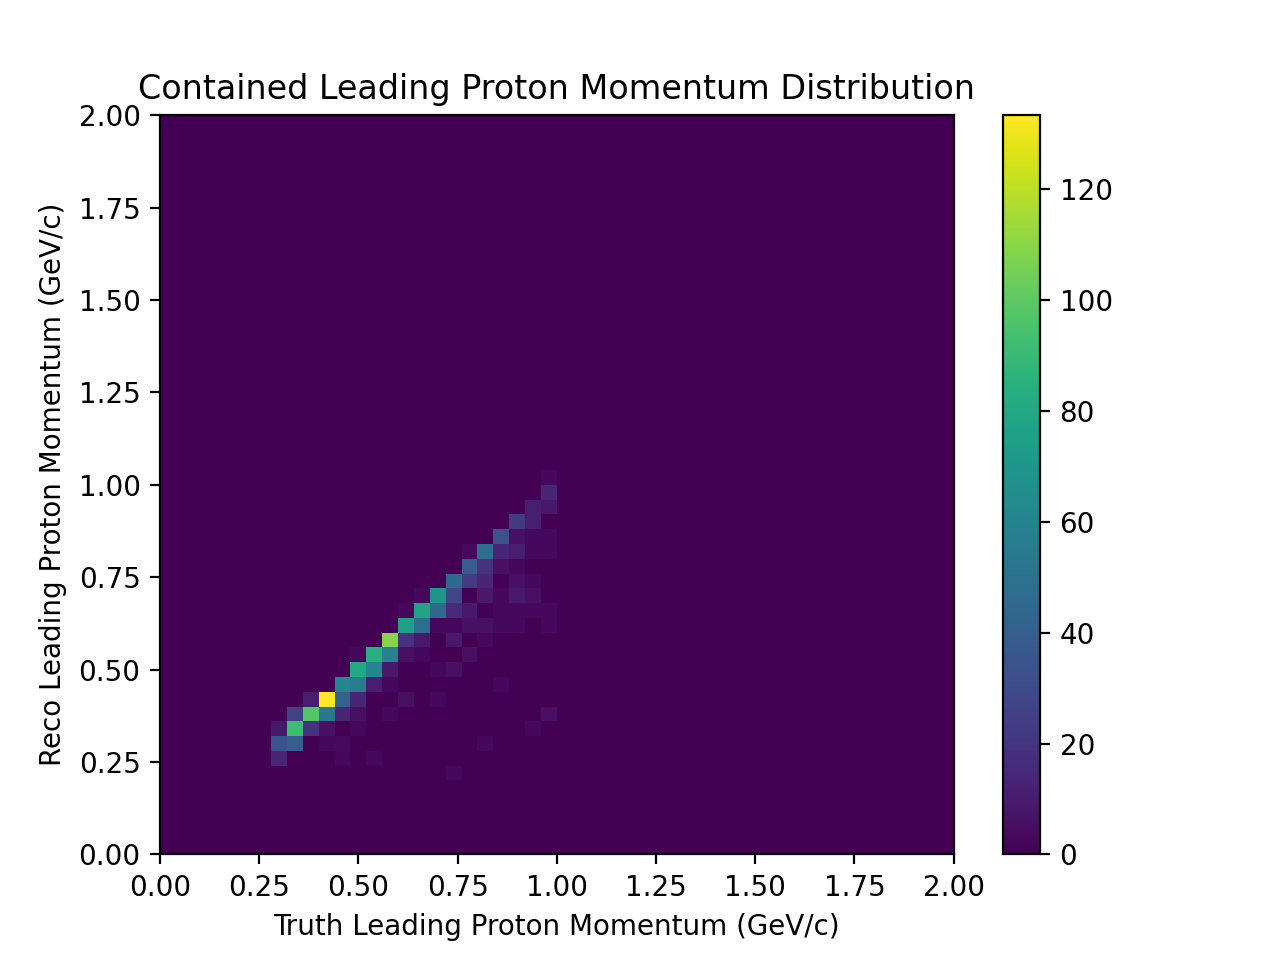

In [52]:
# contained leading proton 2d plot

# Create the figure and axis
fig, ax = plt.subplots()

# Define edges for the histogram bins
numberBins = 50

#maxTruth = np.max(passedTruthMomPi_arr)
#maxReco = np.max(passedRecoMomPi_arr)
#maxRange = maxReco if maxReco > maxTruth else maxTruth
maxRange = 2.0

#minTruth = np.min(passedTruthMomPi_arr)
#minReco = np.min(passedRecoMomPi_arr)
#minRange = minReco if minReco < minTruth else minTruth
minRange= 0.0

binEdgeRange = (minRange, maxRange)

countsTrue, binsTrue = np.histogram(passedTruthMomLPContained_arr, bins=numberBins, weights=passedWeightsContained_arr, range=binEdgeRange)
countsReco, binsReco = np.histogram(passedRecoMomLPContained_arr, bins=numberBins, weights=passedWeightsContained_arr, range=binEdgeRange)


# Create a 2D histogram
hist, xedges, yedges = np.histogram2d(passedTruthMomLPContained_arr, 
                                       passedRecoMomLPContained_arr, 
                                       bins=(binsTrue, binsReco), 
                                       weights=passedWeightsContained_arr)

scaledHist = hist*scale

# Create the pcolormesh plot
c = ax.pcolormesh(xedges, yedges, scaledHist.T, shading='auto')

# Add labels and title
plt.xlabel('Truth Leading Proton Momentum (GeV/c)')
plt.ylabel('Reco Leading Proton Momentum (GeV/c)')
plt.title('Contained Leading Proton Momentum Distribution')

# Add a colorbar
cbar = plt.colorbar(c, ax=ax)
#cbar.set_label('Counts')

# Show the plot
plt.show()

<IPython.core.display.Javascript object>


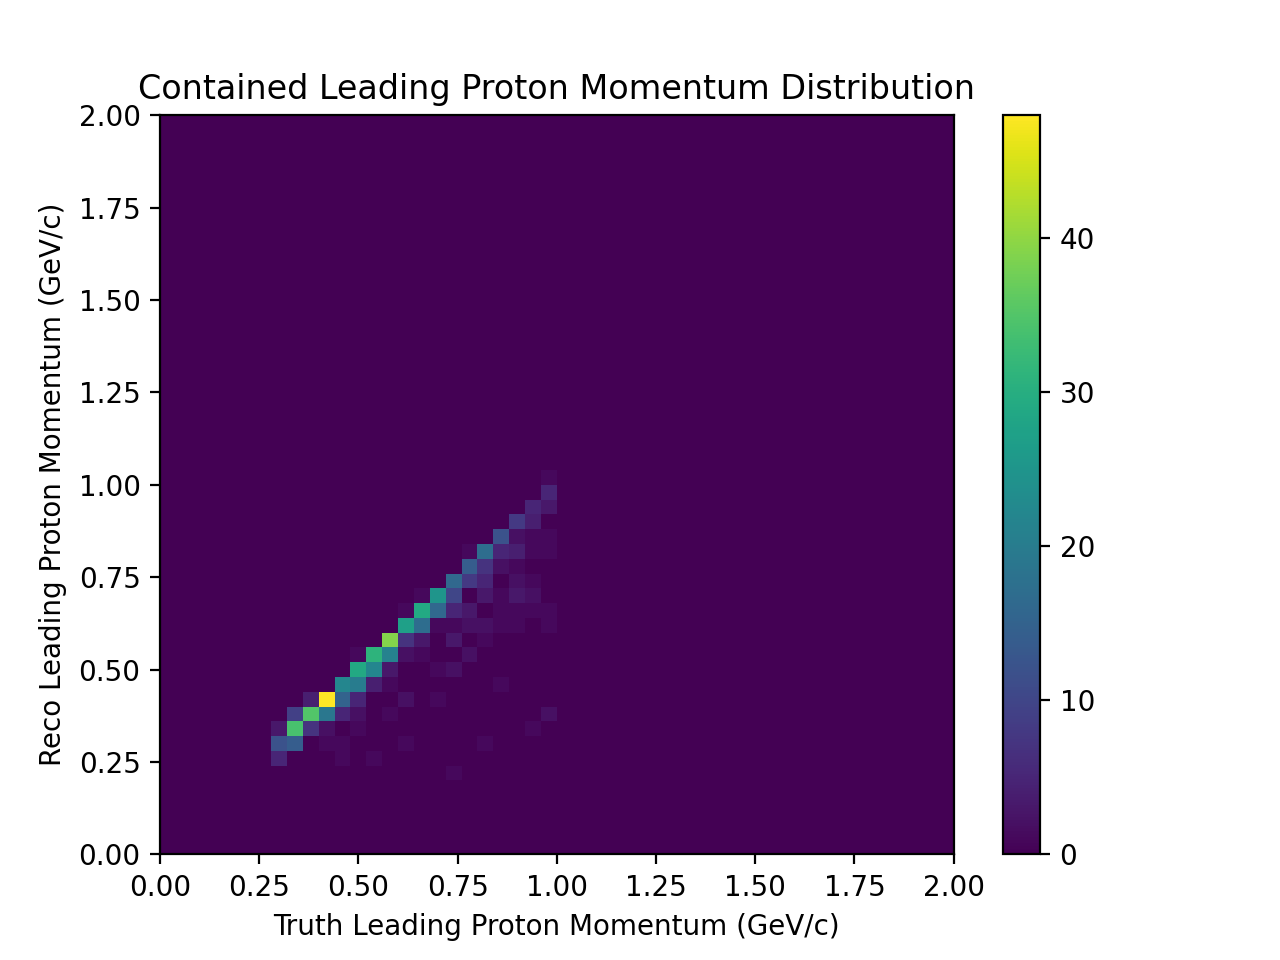

In [53]:
# OLD contained leading proton 2d plot (DON'T USE, no scaling or proper binning, POT weighting)

fig, ax = plt.subplots()

h = ax.hist2d(passedTruthMomLPContained_arr, passedRecoMomLPContained_arr, bins = 50, range=[[0.,2.0],[0., 2.0]])
plt.xlabel('Truth Leading Proton Momentum (GeV/c)')
plt.ylabel('Reco Leading Proton Momentum (GeV/c)')
plt.title('Contained Leading Proton Momentum Distribution')
fig.colorbar(h[3], ax=ax)

# plt.show()